In [1]:
!pip install opensmile;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.3/494.3 KB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 KB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=169063 sha256=296eedd7faaffc69074e370f6eaebb50189ef32de1c3c7a76128ea42d220734b
  Stored in directory: /root/.cache/pip/wheels/43/3f/de/07f35ac2a2cd11ff30224e3fc6fbf458d7fc95effb1f673431
Successfully built iso-639


--------------------------------------
Speakers
--------------------------------------
'DC', 'JE', 'JK' and 'KL' are four male speakers recorded for the SAVEE database


--------------------------------------
Audio data 
--------------------------------------
Audio files consist of audio WAV files sampled at 44.1 kHz

There are 15 sentences for each of the 7 emotion categories.
The initial letter(s) of the file name represents the emotion class, and the following digits represent the sentence number.
The letters 'a', 'd', 'f', 'h', 'n', 'sa' and 'su' represent 'anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness' and 'surprise' emotion classes respectively. 
E.g., 'd03.wav' is the 3rd disgust sentence. 


In [2]:
import opensmile
import pandas as pd
import numpy as np

import os
import sys
import tensorflow as tf
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip "drive/MyDrive/Speech Emotion Recognition /AudioData.zip" -d "/AudioDataSAVEE";

Archive:  drive/MyDrive/Speech Emotion Recognition /AudioData.zip
   creating: /AudioDataSAVEE/AudioData/
   creating: /AudioDataSAVEE/AudioData/DC/
  inflating: /AudioDataSAVEE/AudioData/DC/a01.wav  
  inflating: /AudioDataSAVEE/AudioData/DC/a02.wav  
  inflating: /AudioDataSAVEE/AudioData/DC/a03.wav  
  inflating: /AudioDataSAVEE/AudioData/DC/a04.wav  
  inflating: /AudioDataSAVEE/AudioData/DC/a05.wav  
  inflating: /AudioDataSAVEE/AudioData/DC/a06.wav  
  inflating: /AudioDataSAVEE/AudioData/DC/a07.wav  
  inflating: /AudioDataSAVEE/AudioData/DC/a08.wav  
  inflating: /AudioDataSAVEE/AudioData/DC/a09.wav  
  inflating: /AudioDataSAVEE/AudioData/DC/a10.wav  
  inflating: /AudioDataSAVEE/AudioData/DC/a11.wav  
  inflating: /AudioDataSAVEE/AudioData/DC/a12.wav  
  inflating: /AudioDataSAVEE/AudioData/DC/a13.wav  
  inflating: /AudioDataSAVEE/AudioData/DC/a14.wav  
  inflating: /AudioDataSAVEE/AudioData/DC/a15.wav  
  inflating: /AudioDataSAVEE/AudioData/DC/d01.wav  
  inflating: /Audio

In [4]:
import os
pathToData = r"/AudioDataSAVEE/AudioData/"

In [5]:
#https://www.kaggle.com/code/mihaibeuca1997/ser-cnn-v2
savee_directory_list = os.listdir(pathToData)

file_emotion = []
file_path = []
speaker_identity = []

for fileDir in savee_directory_list:
  for file in os.listdir(pathToData + fileDir):
    speaker_identity.append(fileDir)
    file_path.append(pathToData + fileDir+"/" + file)
    #part = file.split('_')[1]
    ele = file[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
Savee_df.Emotions.value_counts()

neutral     120
happy        60
fear         60
surprise     60
angry        60
sad          60
disgust      60
Name: Emotions, dtype: int64

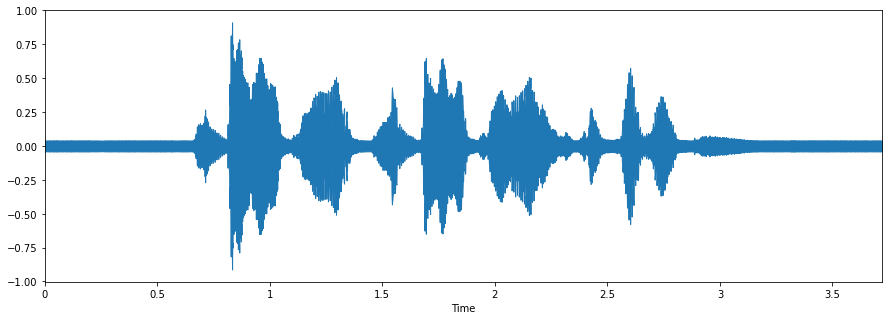

In [7]:
fname = pathToData + 'DC/d12.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

from IPython.display import Audio
Audio(fname)

In [8]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)
smile.feature_names

['F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
 'loudness_sma3_amean',
 'loudness_sma3_stddevNorm',
 'loudness_sma3_percentile20.0',
 'loudness_sma3_percentile50.0',
 'loudness_sma3_percentile80.0',
 'loudness_sma3_pctlrange0-2',
 'loudness_sma3_meanRisingSlope',
 'loudness_sma3_stddevRisingSlope',
 'loudness_sma3_meanFallingSlope',
 'loudness_sma3_stddevFallingSlope',
 'spectralFlux_sma3_amean',
 'spectralFlux_sma3_stddevNorm',
 'mfcc1_sma3_amean',
 'mfcc1_sma3_stddevNorm',
 'mfcc2_sma3_amean',
 'mfcc2_sma3_stddevNorm',
 'mfcc3_sma3_amean',
 'mfcc3_sma3_stddevNorm',
 'mfcc4_

In [9]:
data, sampling_rate = librosa.load(file_path[0])
max_length = len(data)
df = smile.process_signal(
    data,
    sampling_rate
)
for audioFile in file_path[1:]: 
  data, sampling_rate = librosa.load(audioFile)
  if len(data)>= max_length:#finding maximum length across all the utterances
    max_length = len(data)
  df = pd.concat([df, smile.process_signal(
    data,
    sampling_rate
)])

In [10]:
max_length

157409

In [11]:
df

F0semitoneFrom27.5Hz_sma3nz_amean  \
start  end                                                         
0 days 0 days 00:00:02.494784                          26.537930   
       0 days 00:00:03.275691                          28.113647   
       0 days 00:00:03.459092                          32.526066   
       0 days 00:00:03.637006                          28.163269   
       0 days 00:00:04.174013                          32.735153   
...                                                          ...   
       0 days 00:00:05.669387                          32.477219   
       0 days 00:00:02.909115                          40.873959   
       0 days 00:00:03.559319                          32.395985   
       0 days 00:00:03.002811                          27.798397   
       0 days 00:00:03.347936                          26.267698   

                               F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
start  end                                                              
0 days 0 days 00:00:02.494784                                0.103024   
       0 days 00:00:03.275691                                0.145267   
       0 days 00:00:03.459092                                0.206223   
       0 days 00:00:03.637006                                0.141669   
       0 days 00:00:04.174013                                0.198610   
...                                                               ...   
       0 days 00:00:05.669387                                0.148241   
       0 days 00:00:02.909115                                0.177201   
       0 days 00:00:03.559319                                0.141759   
       0 days 00:00:03.002811                                0.142988   
       0 days 00:00:03.347936                                0.066907   

                               F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
start  end                                                                  
0 days 0 days 00:00:02.494784                                   23.906029   
       0 days 00:00:03.275691                                   25.105289   
       0 days 00:00:03.459092                                   26.682640   
       0 days 00:00:03.637006                                   25.590258   
       0 days 00:00:04.174013                                   26.347588   
...                                                                   ...   
       0 days 00:00:05.669387                                   29.363577   
       0 days 00:00:02.909115                                   34.067726   
       0 days 00:00:03.559319                                   28.632484   
       0 days 00:00:03.002811                                   23.974627   
       0 days 00:00:03.347936                                   24.890617   

                               F0semitoneFrom27.5Hz_sma3nz_percentile50.0  \
start  end                                                                  
0 days 0 days 00:00:02.494784                                   26.212734   
       0 days 00:00:03.275691                                   27.863745   
       0 days 00:00:03.459092                                   33.726089   
       0 days 00:00:03.637006                                   27.634136   
       0 days 00:00:04.174013                                   33.042622   
...                                                                   ...   
       0 days 00:00:05.669387                                   32.655266   
       0 days 00:00:02.909115                                   43.799835   
       0 days 00:00:03.559319                                   32.278957   
       0 days 00:00:03.002811                                   29.256573   
       0 days 00:00:03.347936                                   25.900002   

                               F0semitoneFrom27.5Hz_sma3nz_percentile80.0  \
start  end                                                                  
0 days 0 days 00:00:02.494784         

We have extracted all the functionals for all the signal. Now, we need to split the data into training and validation.

In [12]:
X = df.to_numpy() #no_of_samples x 88

In [13]:
y = file_emotion

In [14]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import collections
import matplotlib
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,accuracy_score,classification_report

In [15]:
X_train, X_test, y_train, y_test, speaker_identity_train, speaker_identity_test = train_test_split(X, y, speaker_identity, test_size=0.33, random_state=42)

In [16]:
#dict(collections.Counter(y_train))
speaker_hist_train = dict(collections.Counter(speaker_identity_train))
speaker_hist_train.values()

dict_values([67, 90, 75, 89])

Text(0.5, 1.0, 'Histogram of the speakers in the Training data')

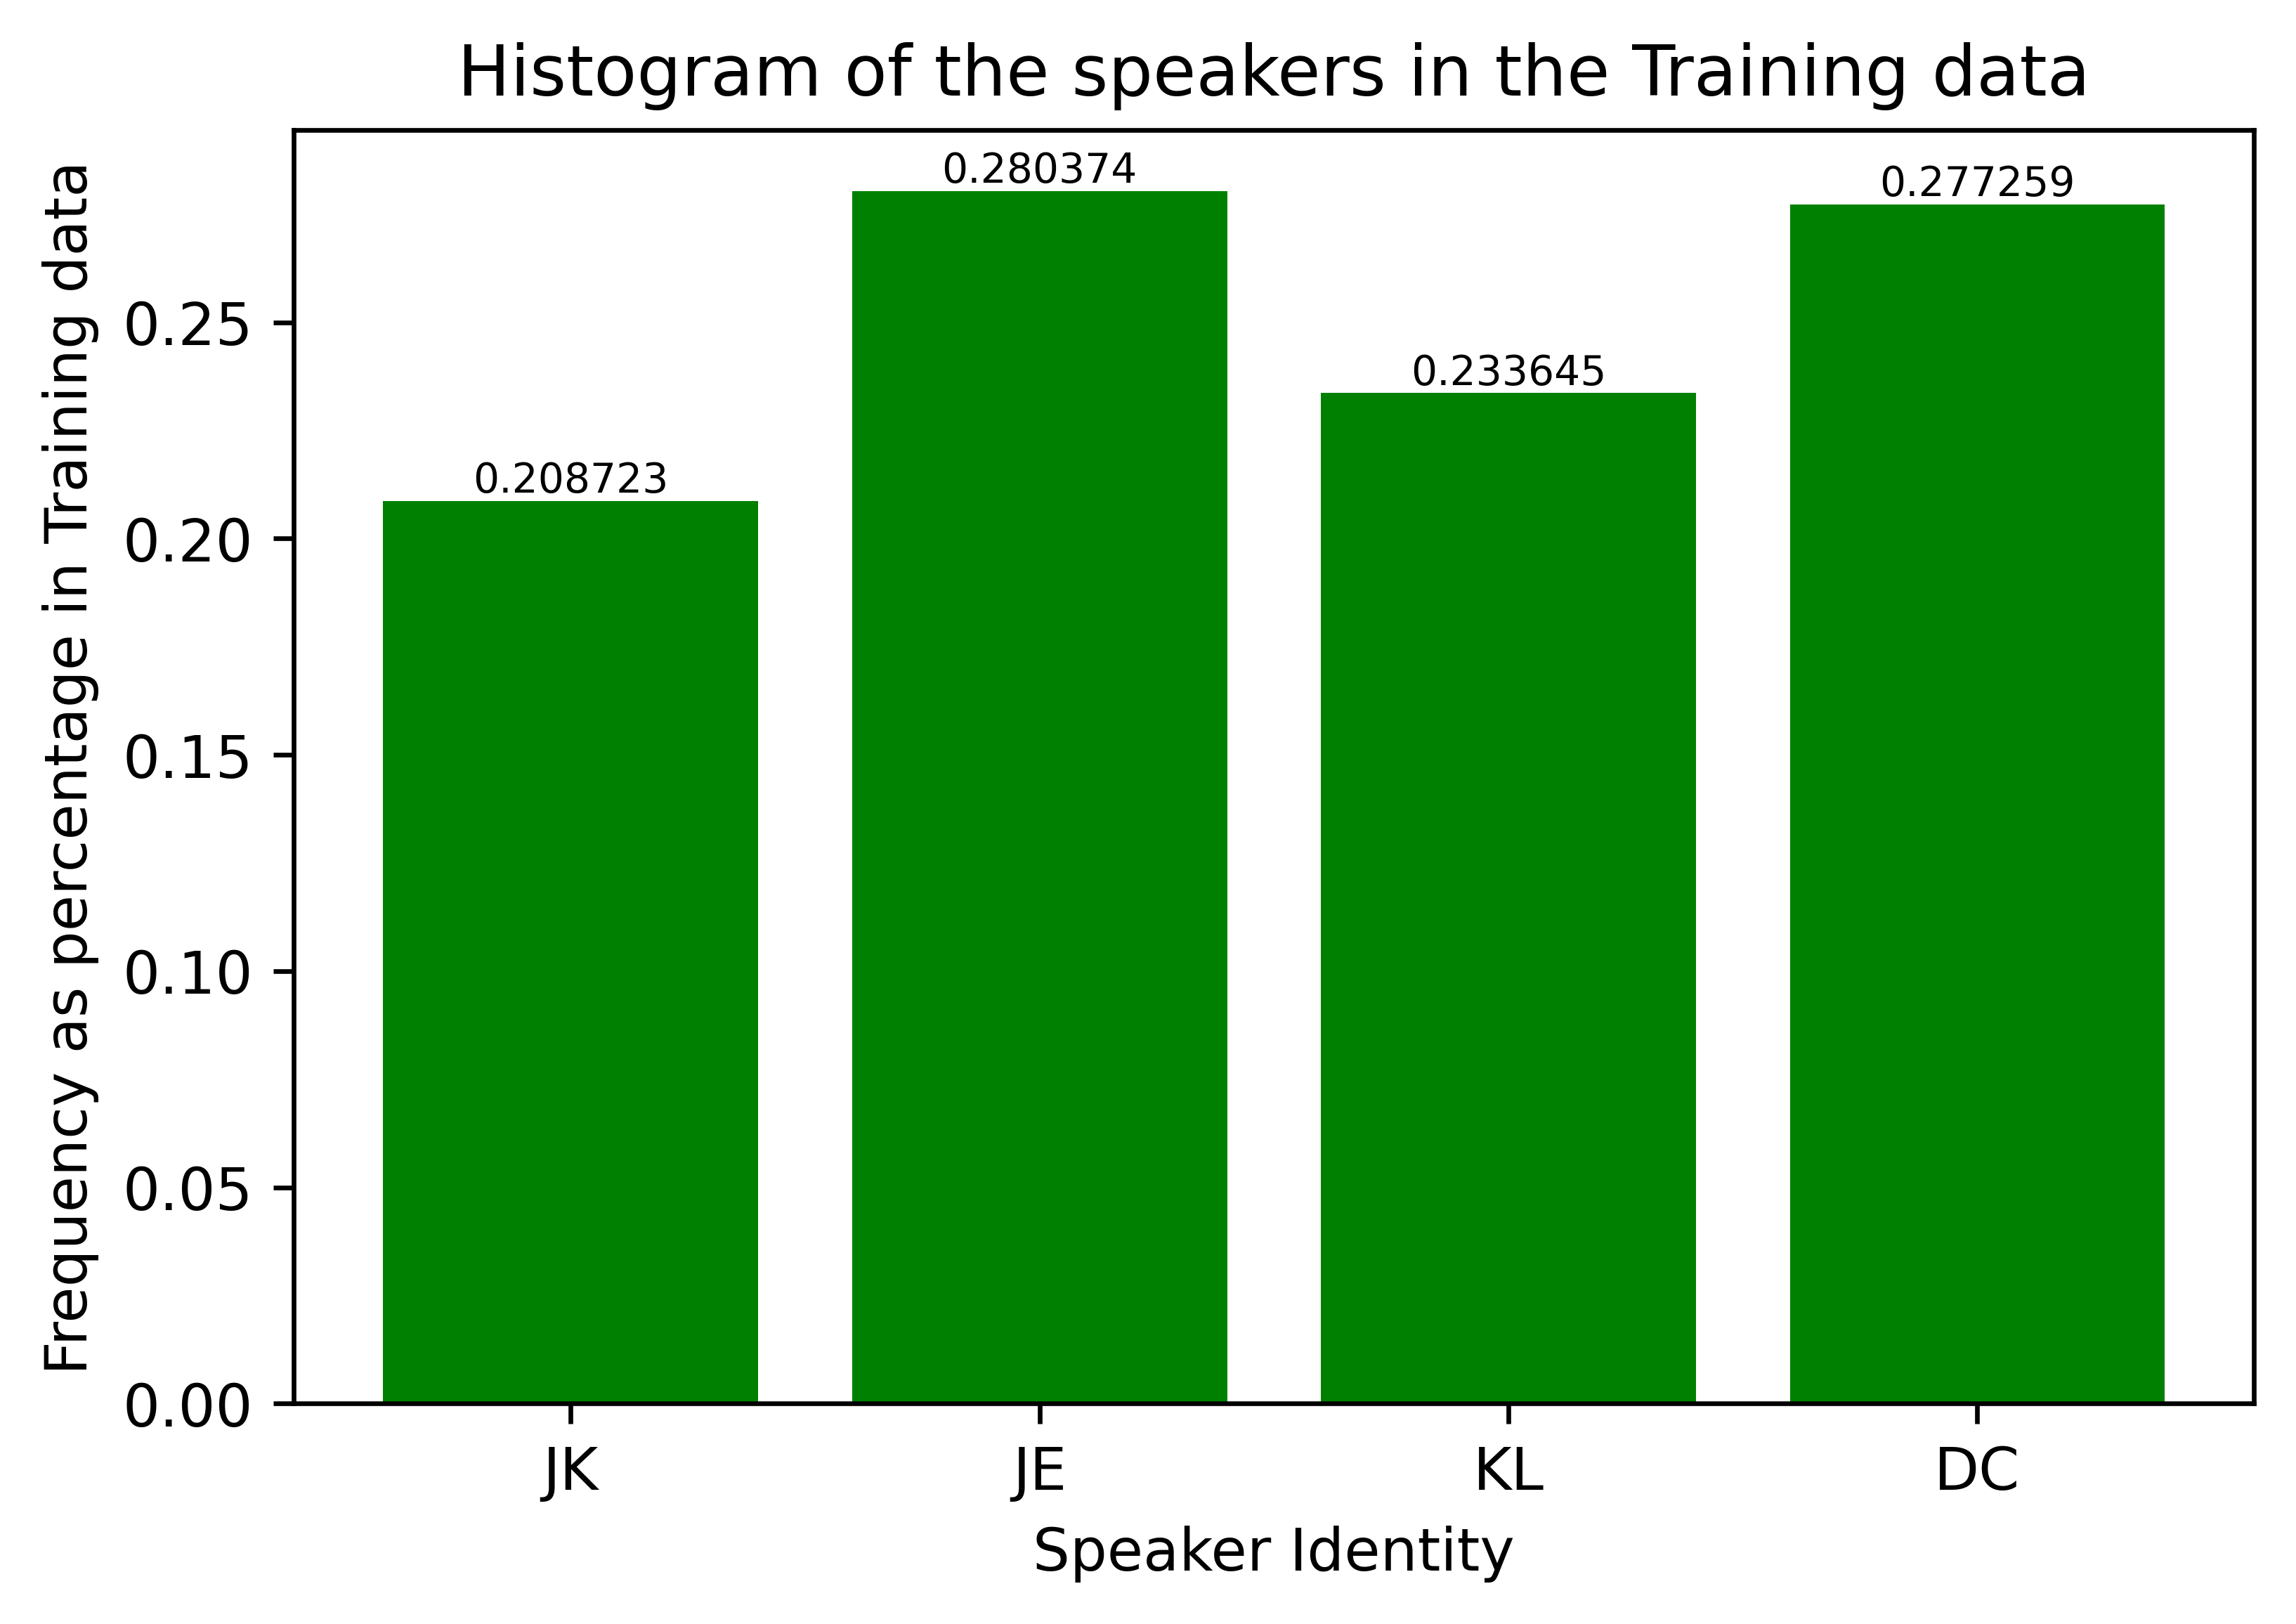

In [ ]:
matplotlib.rcParams["figure.dpi"] = 600
bar = plt.bar(speaker_hist_train.keys(), np.array([i for i in speaker_hist_train.values()])/(sum(speaker_hist_train.values())), color='g')
plt.bar_label(bar, fontsize = 7)
plt.xlabel("Speaker Identity")
plt.ylabel("Frequency as percentage in Training data")
plt.title("Histogram of the speakers in the Training data")

In [ ]:
speaker_hist_test = dict(collections.Counter(speaker_identity_test))
speaker_hist_test.values()

dict_values([53, 45, 30, 31])

Text(0.5, 1.0, 'Histogram of the speakers in the Testing data')

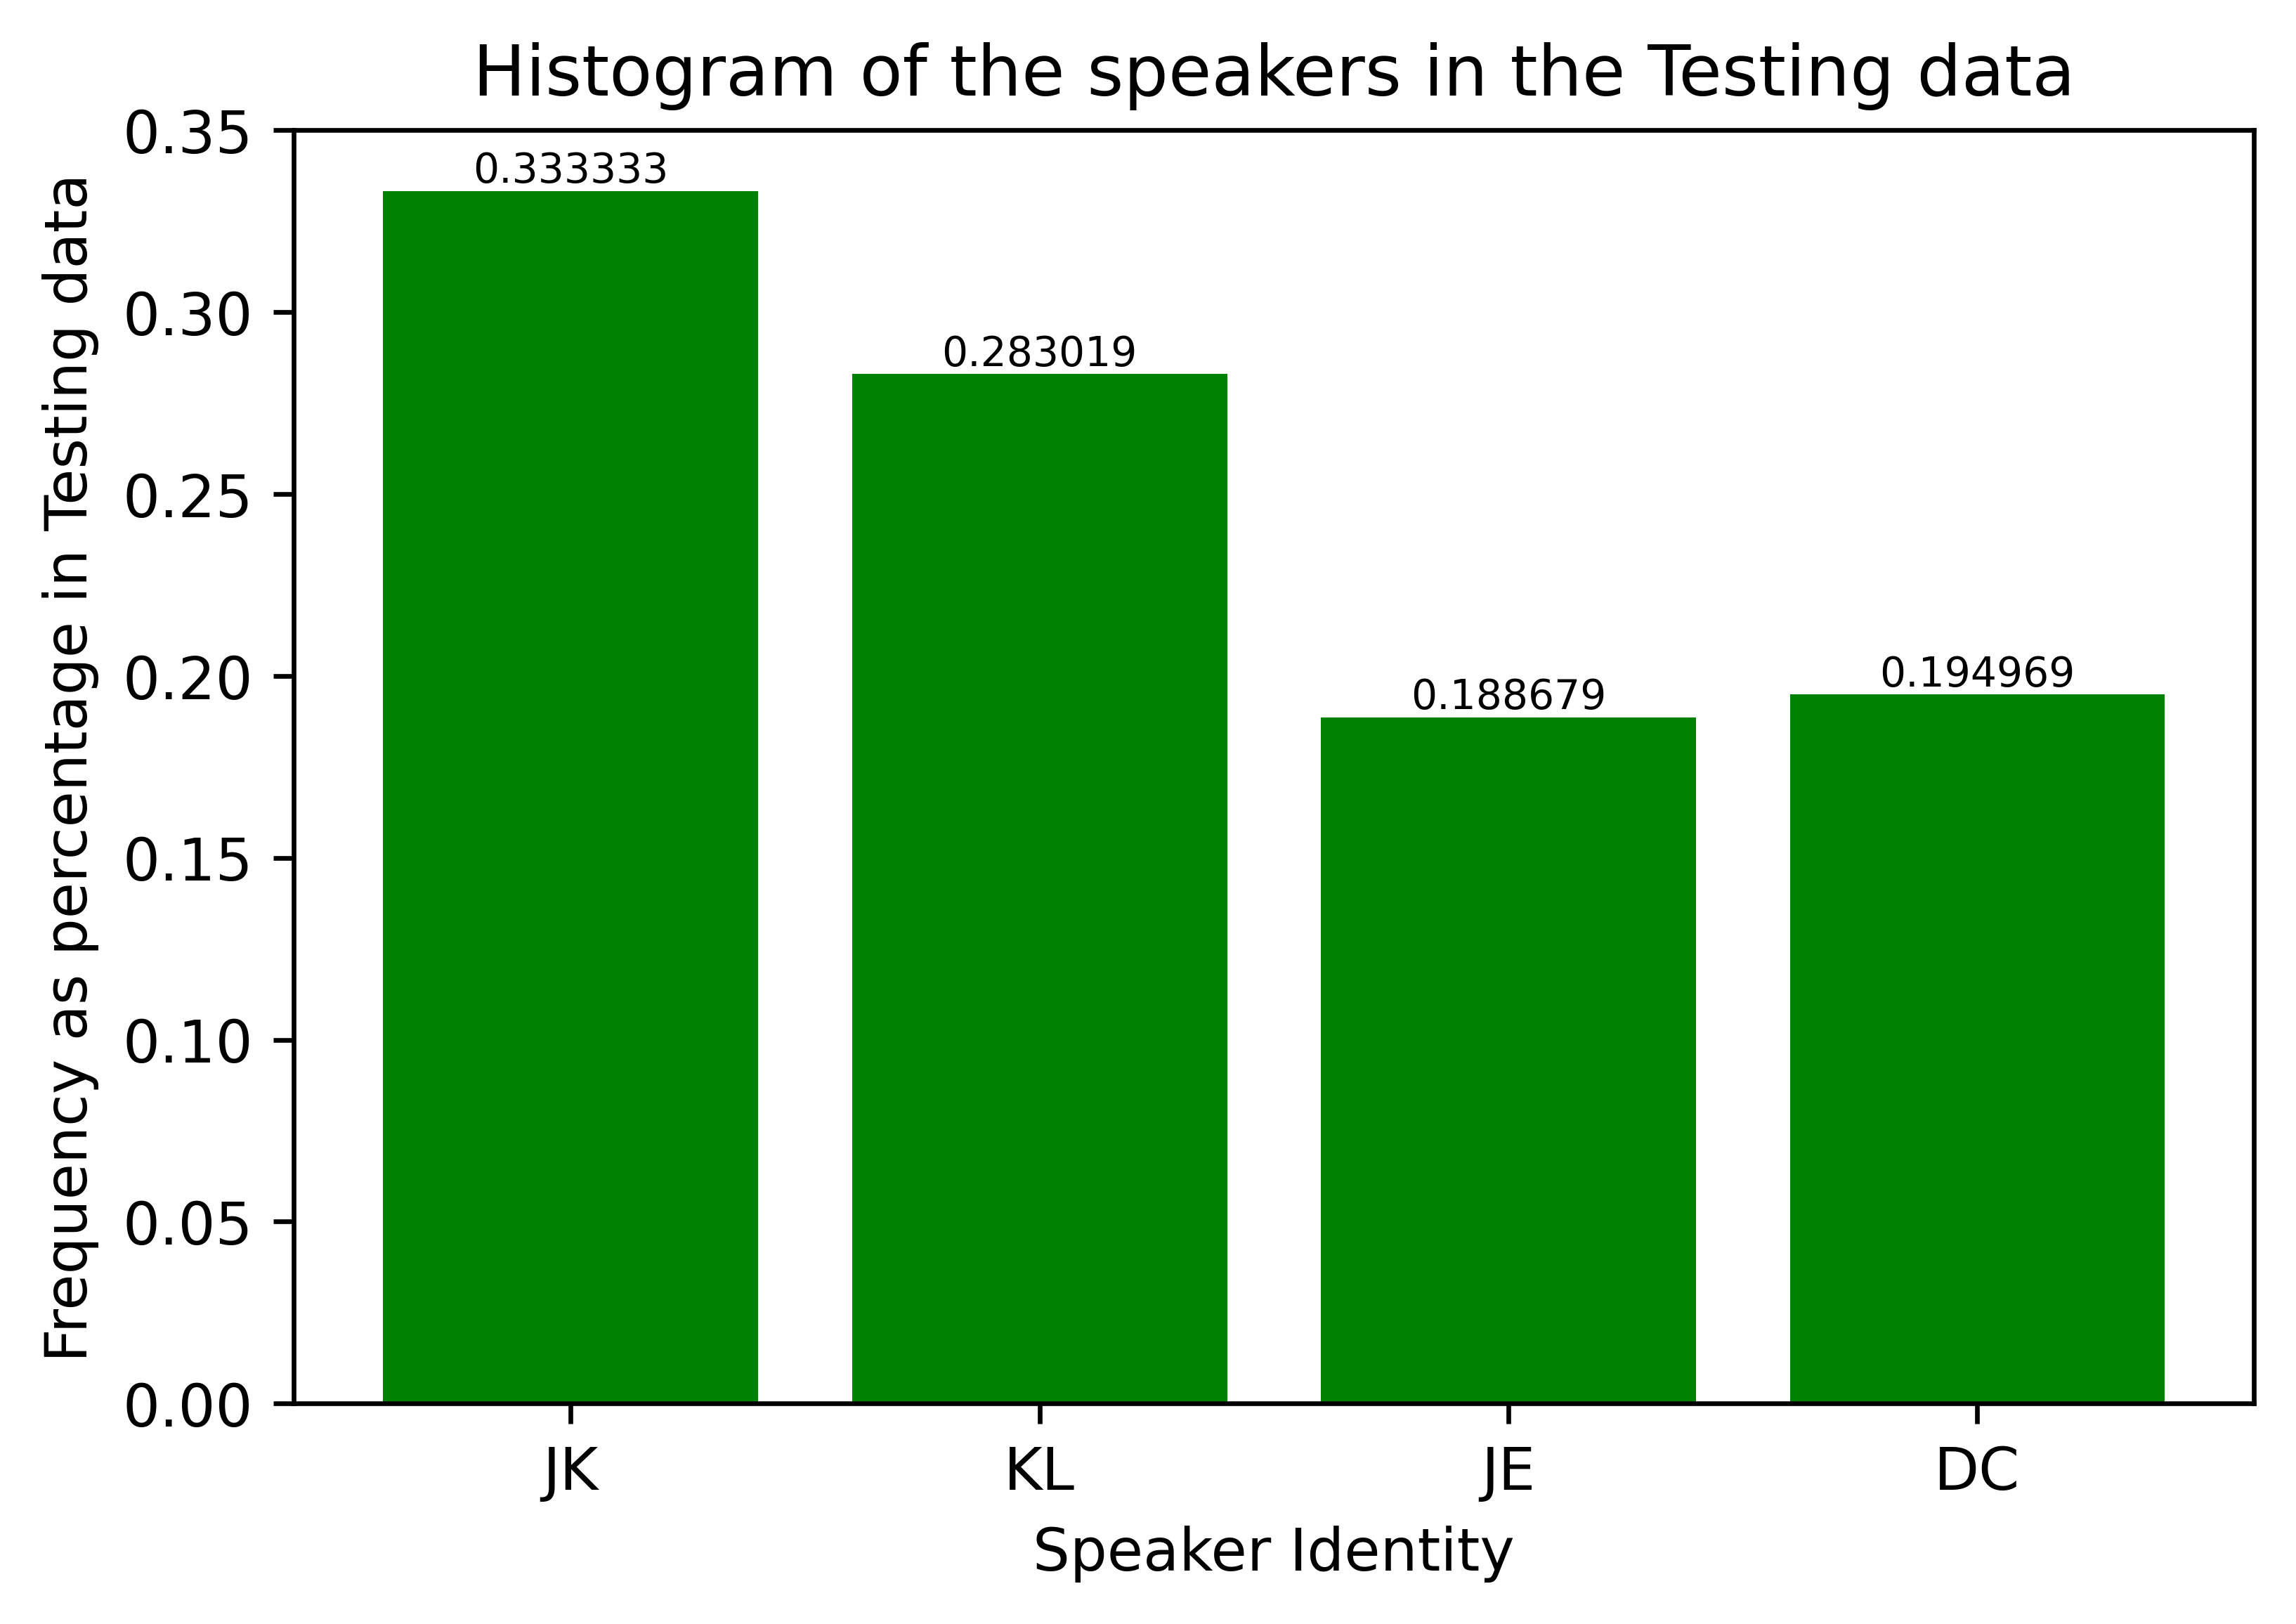

In [ ]:
matplotlib.rcParams["figure.dpi"] = 600
bar = plt.bar(speaker_hist_test.keys(), np.array([i for i in speaker_hist_test.values()])/(sum(speaker_hist_test.values())), color='g')
plt.bar_label(bar, fontsize = 7)
plt.xlabel("Speaker Identity")
plt.ylabel("Frequency as percentage in Testing data")
plt.title("Histogram of the speakers in the Testing data")

In [ ]:
emo_hist_total =  dict(collections.Counter(y))
emo_hist_total.values()

dict_values([60, 60, 60, 60, 60, 60, 120])

Text(0.5, 1.0, 'Histogram of the emotion data in the entire dataset \n (before splitting dataset)')

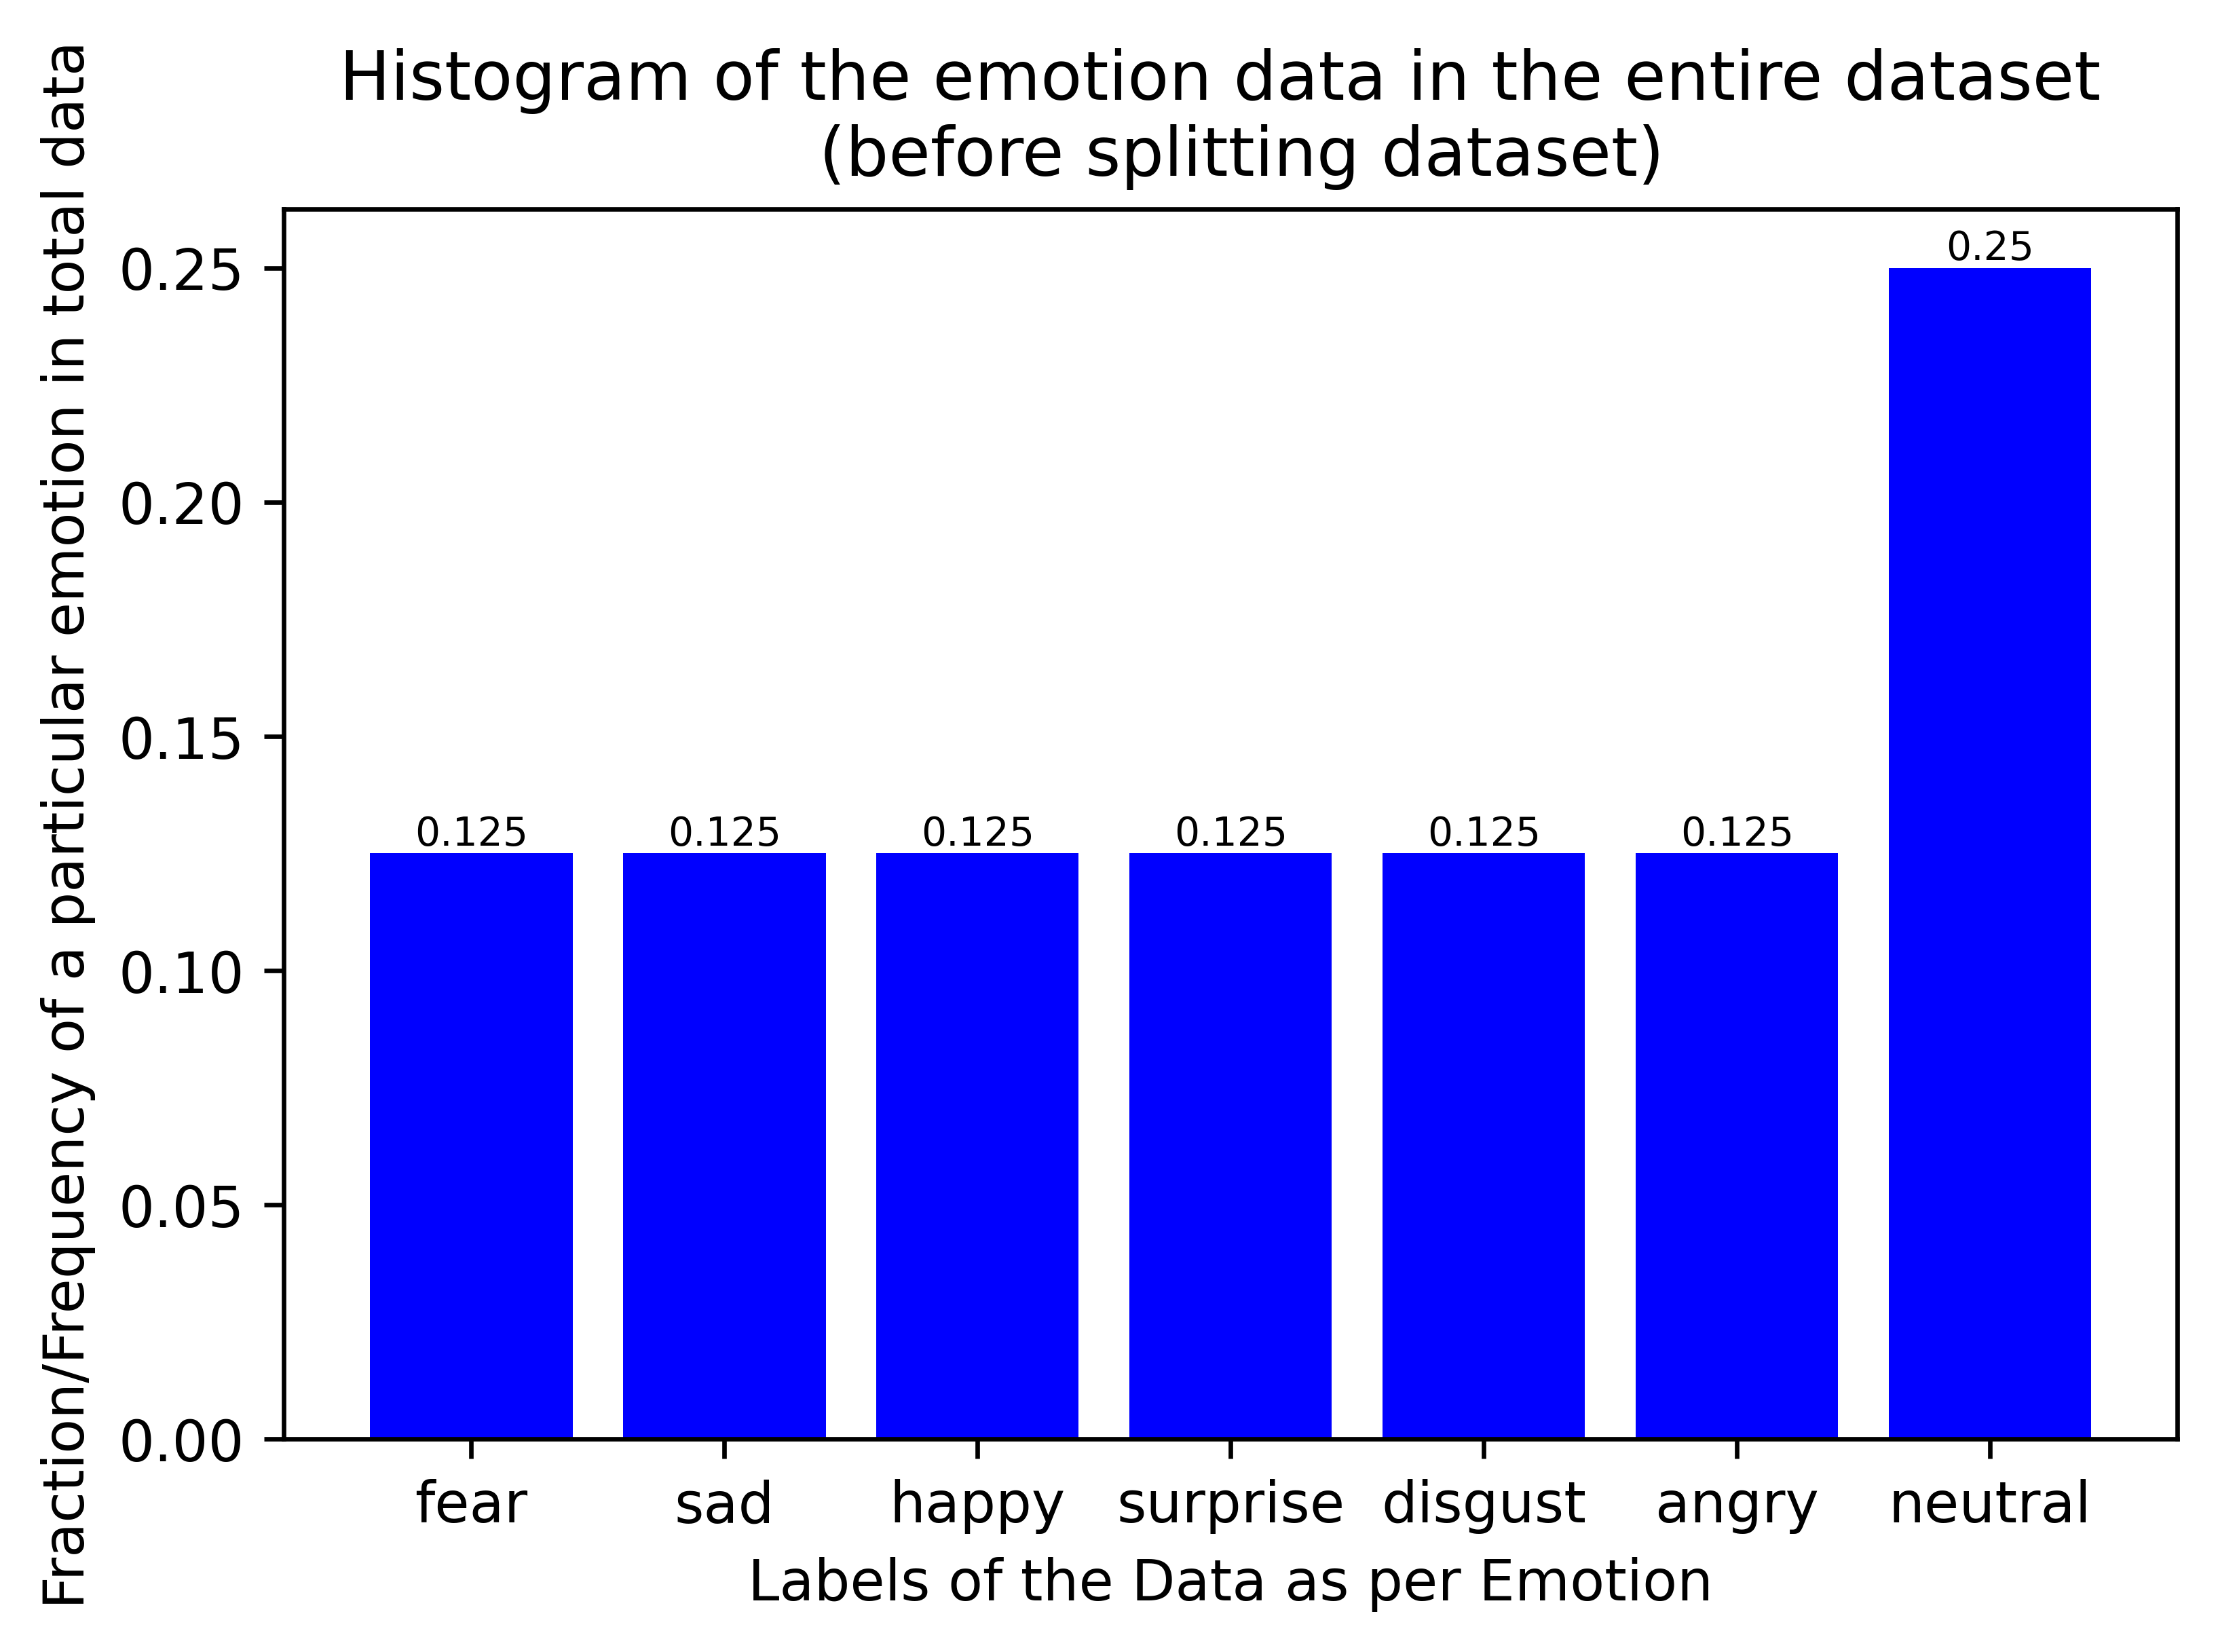

In [ ]:
bar = plt.bar(emo_hist_total.keys(), np.array([i for i in emo_hist_total.values()])/(sum(emo_hist_total.values())), color='b')
plt.bar_label(bar, fontsize = 7)
plt.xlabel("Labels of the Data as per Emotion")
plt.ylabel("Fraction/Frequency of a particular emotion in total data")
plt.title("Histogram of the emotion data in the entire dataset \n (before splitting dataset)")

In [ ]:
emo_hist_train = dict(collections.Counter(y_train))
emo_hist_train.values()

dict_values([35, 35, 43, 49, 44, 73, 42])

Text(0.5, 1.0, 'Histogram of the emotion data in the training data')

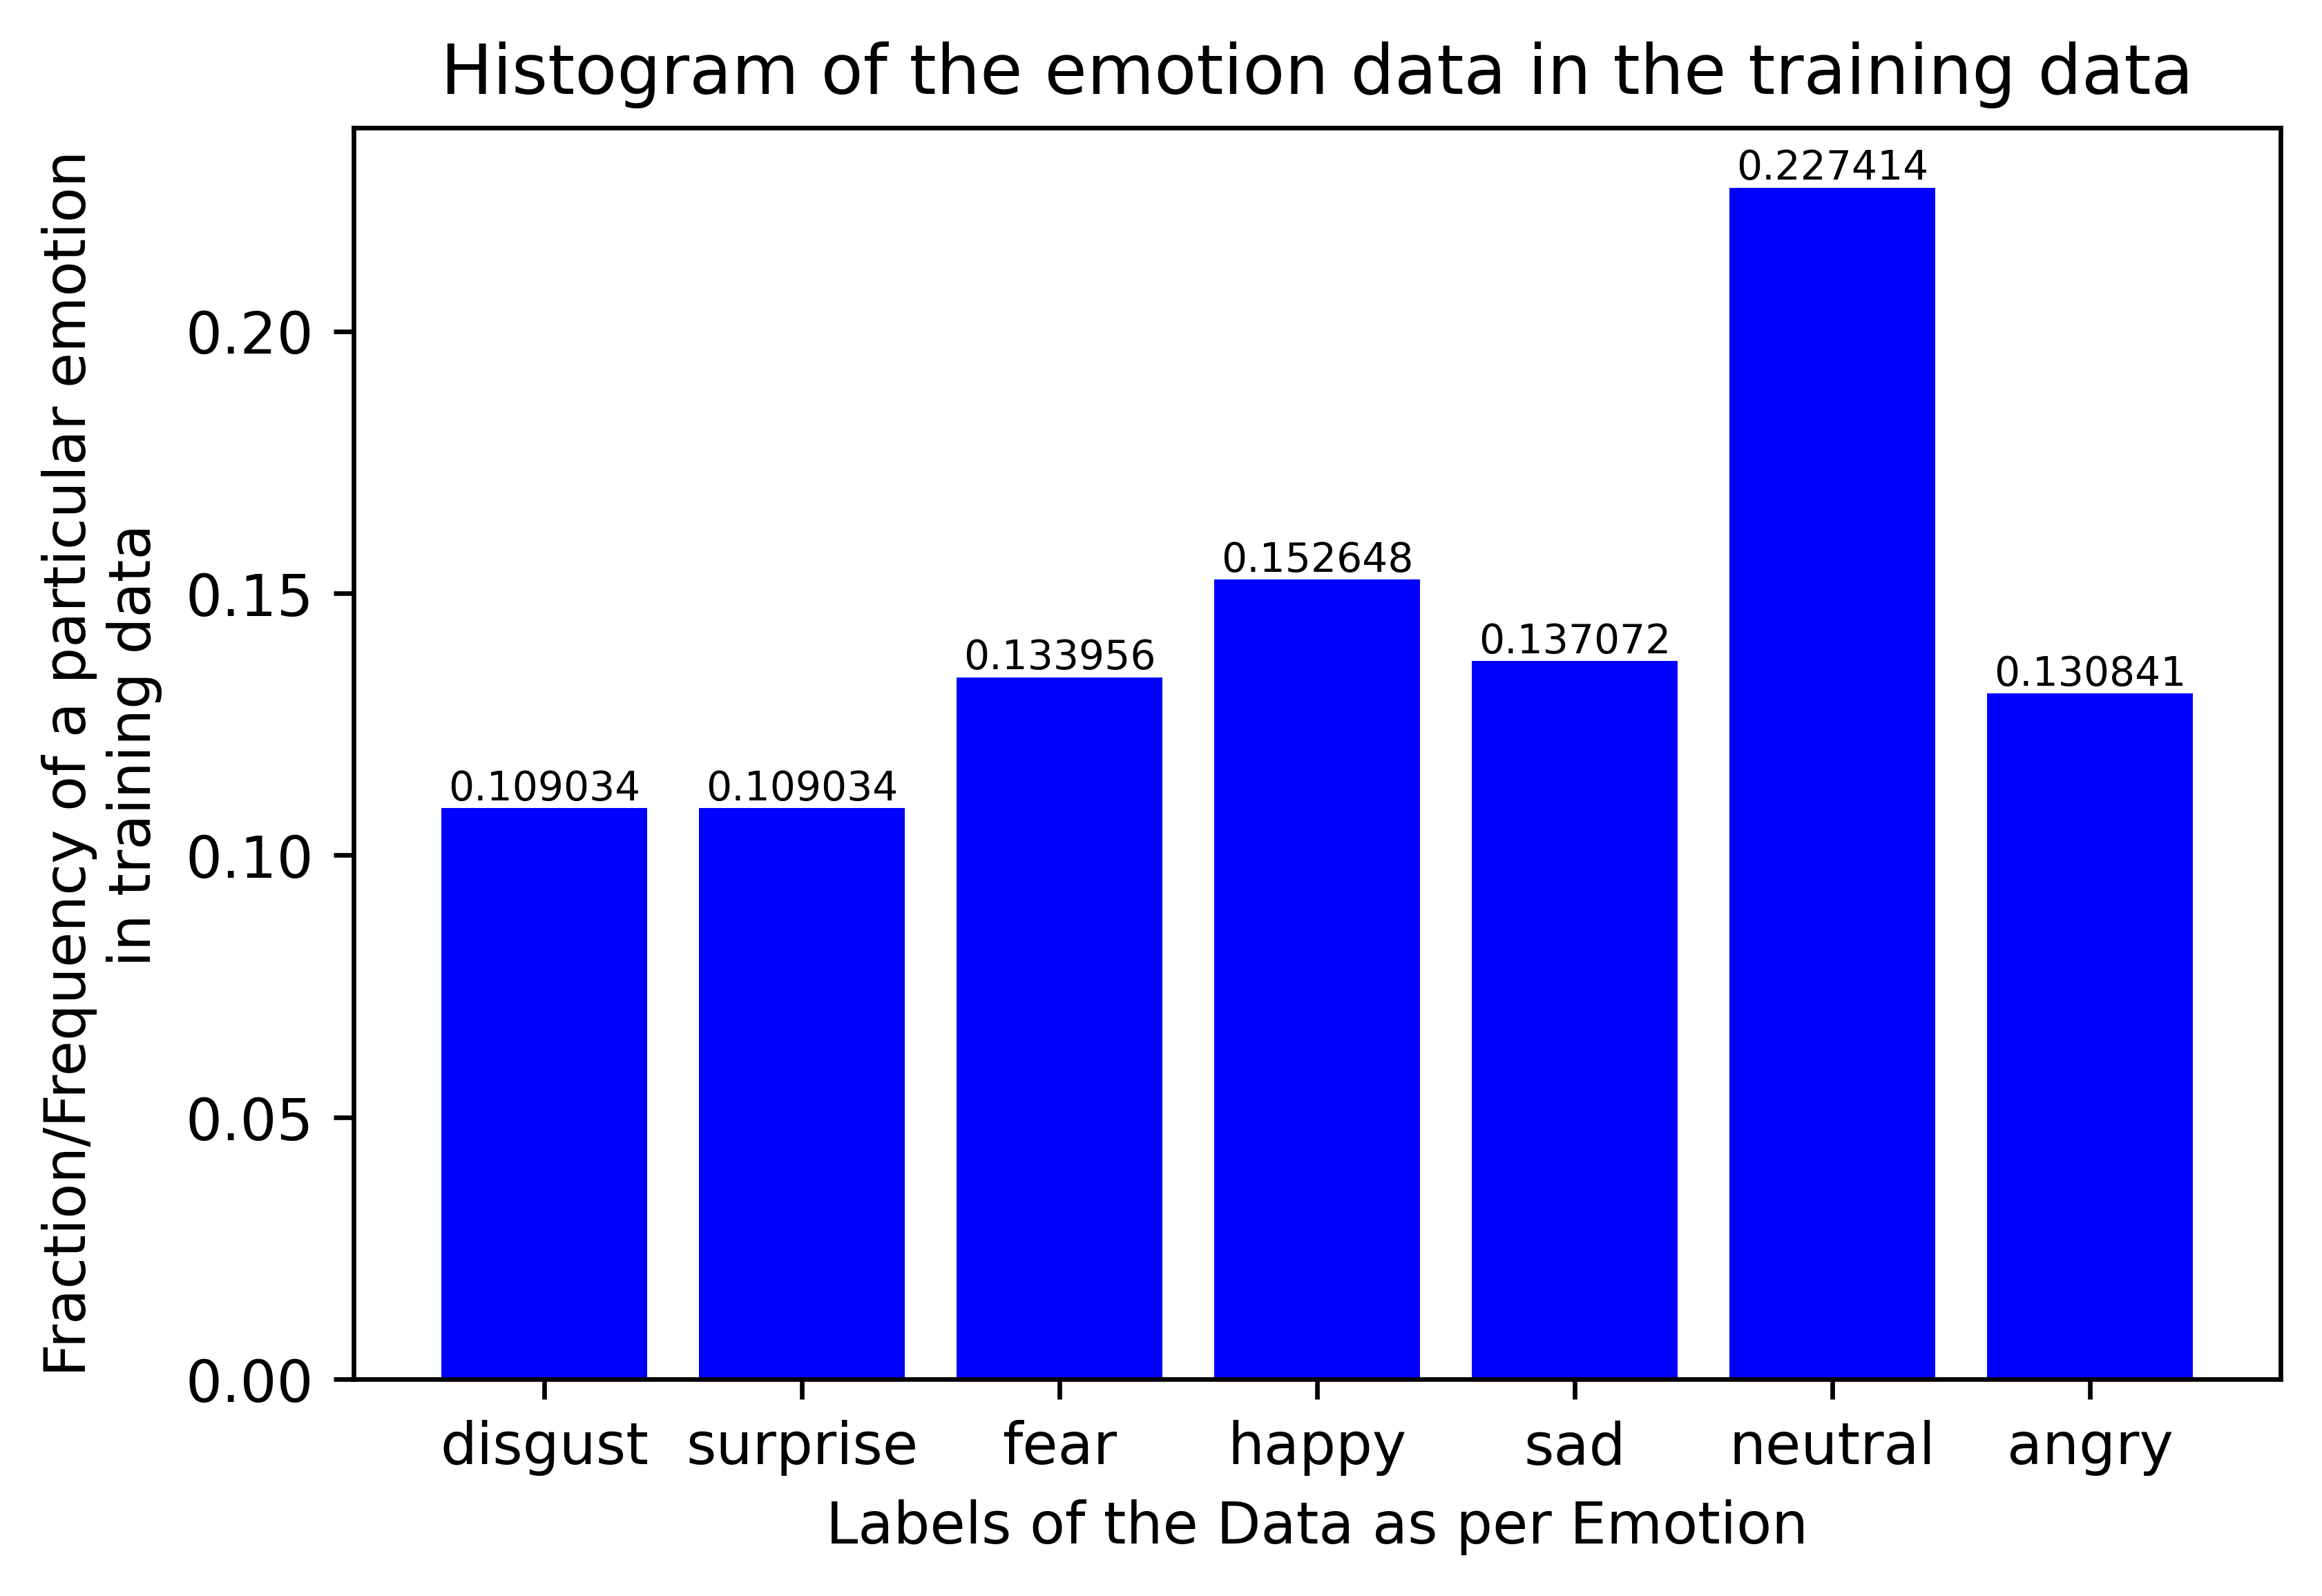

In [ ]:
bar = plt.bar(emo_hist_train.keys(), np.array([i for i in emo_hist_train.values()])/(sum(emo_hist_train.values())), color='b')
plt.bar_label(bar, fontsize = 7)
plt.xlabel("Labels of the Data as per Emotion")
plt.ylabel("Fraction/Frequency of a particular emotion \n in training data")
plt.title("Histogram of the emotion data in the training data")

In [ ]:
emo_hist_test = dict(collections.Counter(y_test))
emo_hist_test.values()

dict_values([25, 11, 25, 47, 18, 16, 17])

Text(0.5, 1.0, 'Histogram of the emotion data in the Testing data')

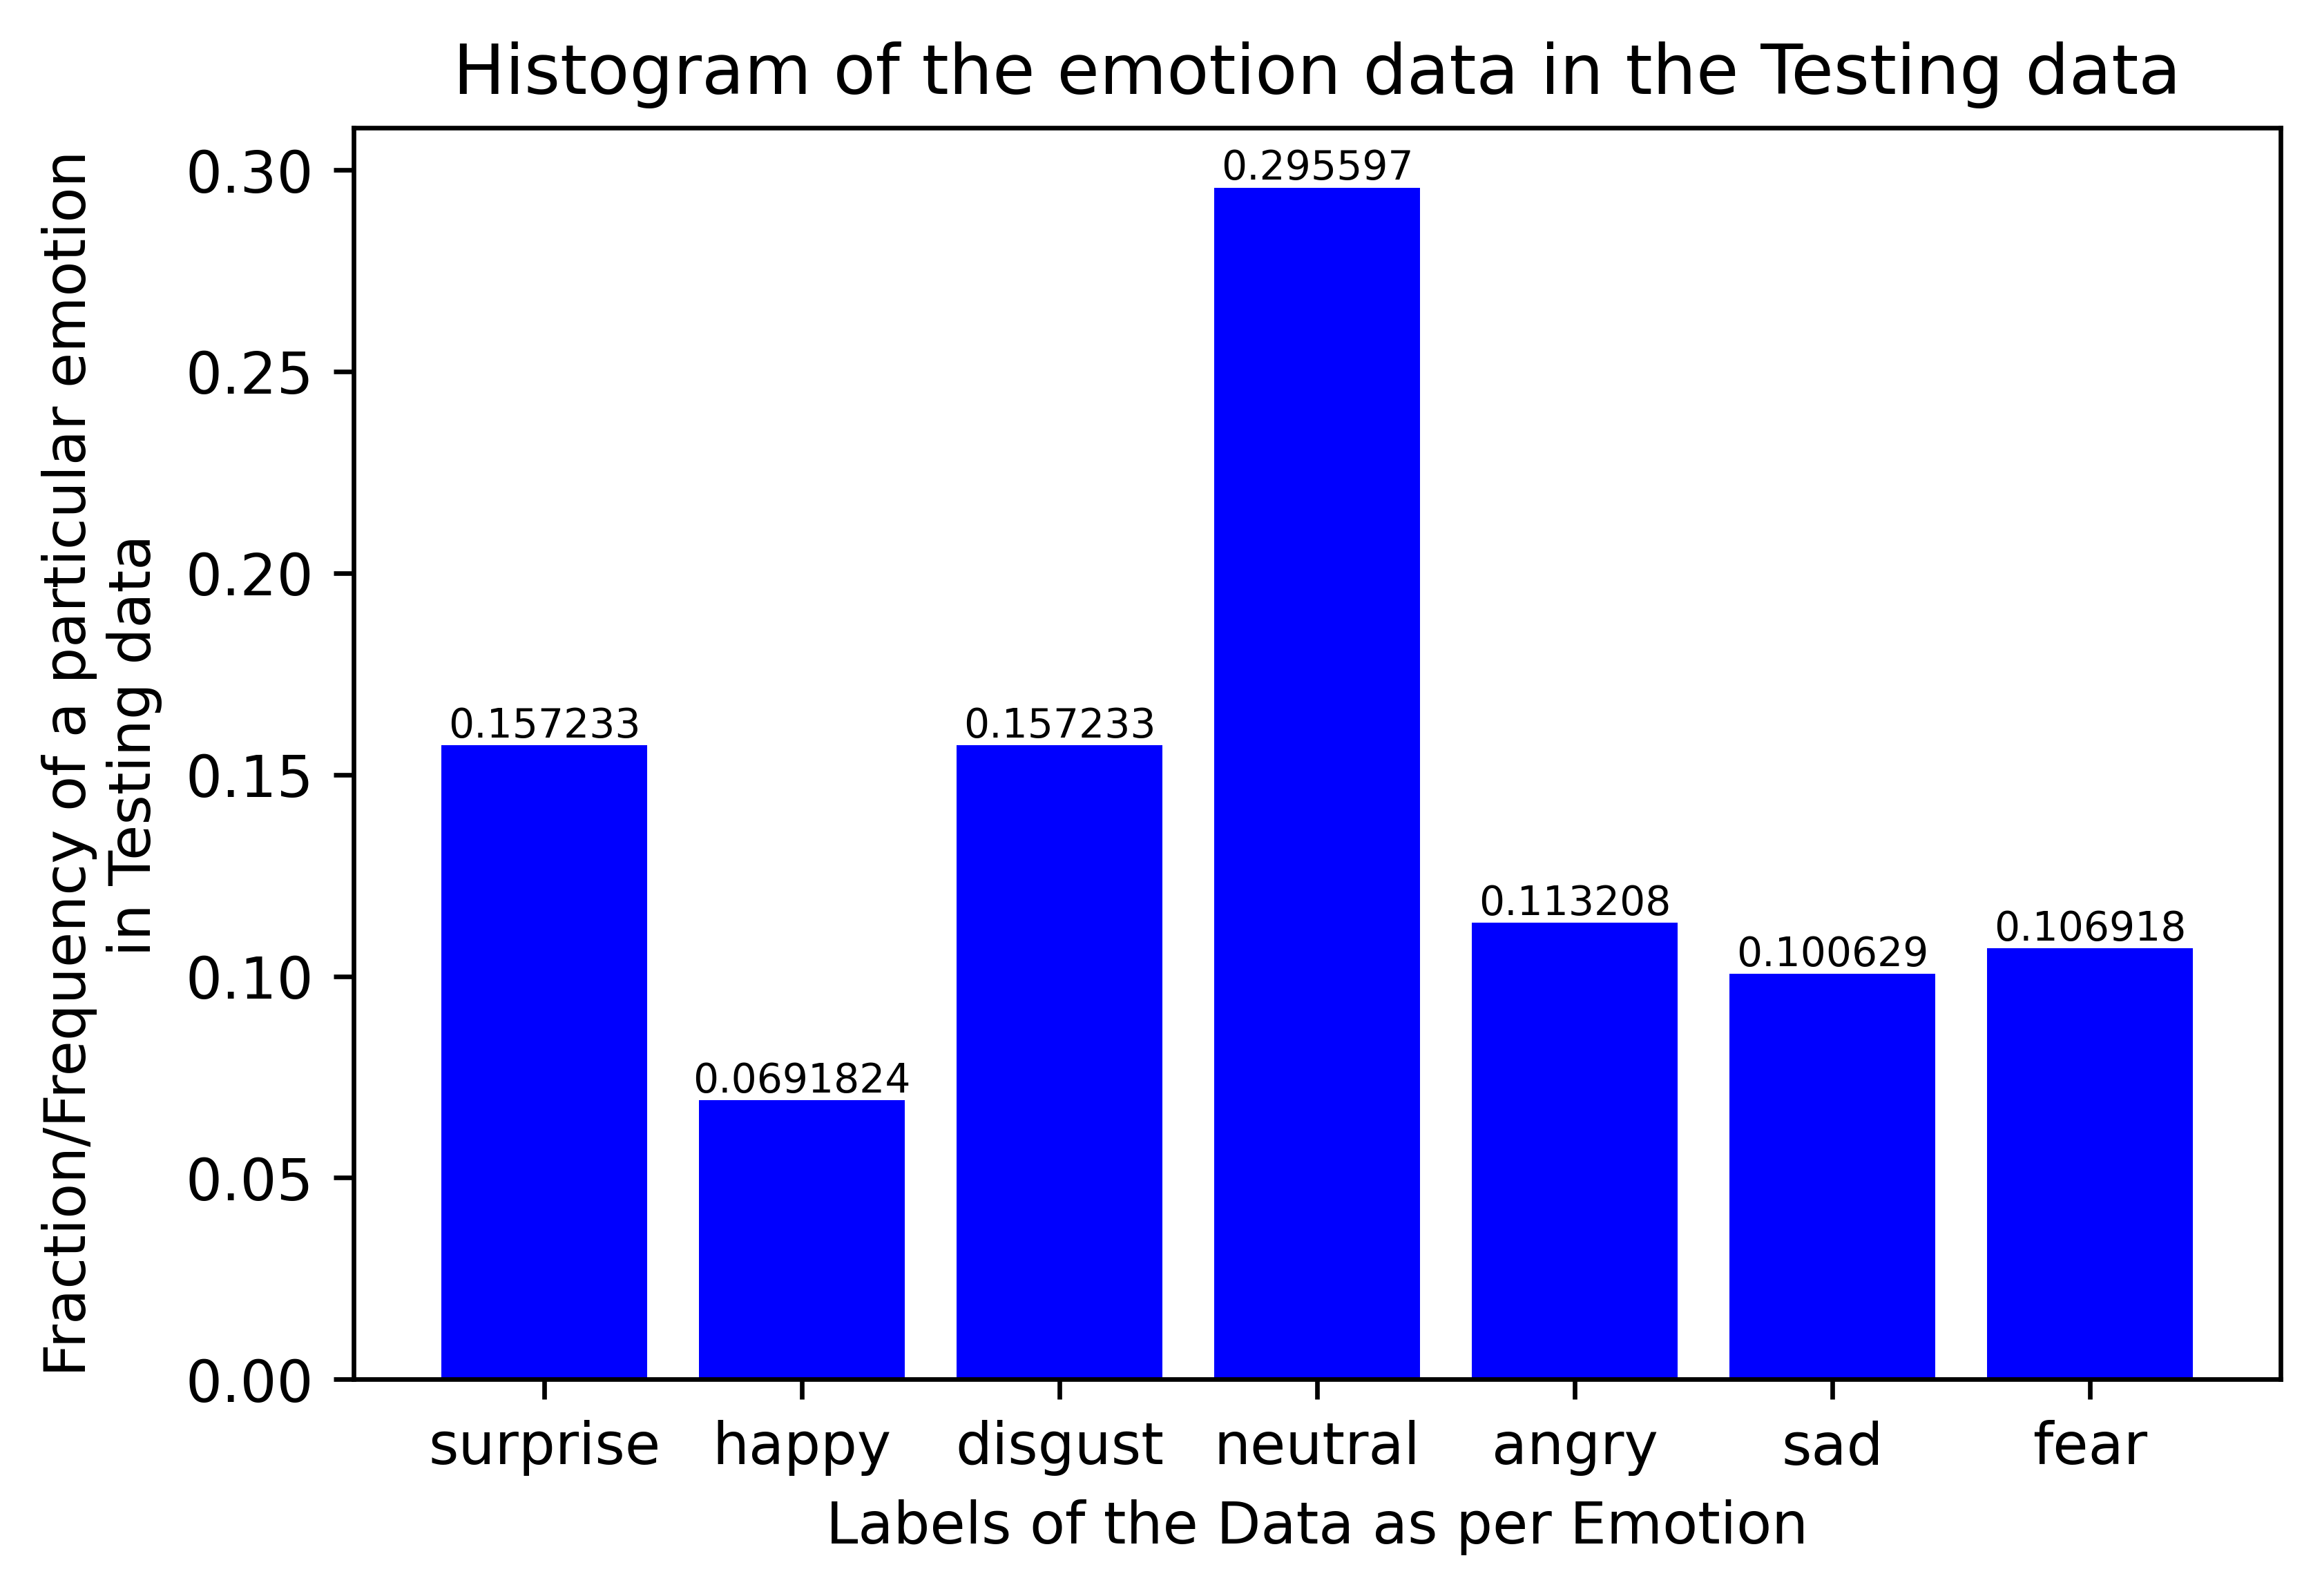

In [ ]:
bar = plt.bar(emo_hist_test.keys(), np.array([i for i in emo_hist_test.values()])/(sum(emo_hist_test.values())), color='b')
plt.bar_label(bar, fontsize = 7)
plt.xlabel("Labels of the Data as per Emotion")
plt.ylabel("Fraction/Frequency of a particular emotion \n in Testing data")
plt.title("Histogram of the emotion data in the Testing data")

We now normalize the train and test data
must be done separately

In [ ]:
X_train

array([[ 28.142948  ,   0.18213977,  24.744211  , ...,   0.16125   ,
          0.14806566, -16.4802    ],
       [ 35.92525   ,   0.22834006,  28.643967  , ...,   0.12249999,
          0.15180168, -10.232996  ],
       [ 38.27981   ,   0.05647712,  36.856247  , ...,   0.695     ,
          0.055     , -14.620409  ],
       ...,
       [ 27.771189  ,   0.12481616,  26.097002  , ...,   0.20799999,
          0.23090257, -14.493828  ],
       [ 25.376892  ,   0.15298285,  22.597603  , ...,   0.16857143,
          0.12755151, -41.92342   ],
       [ 36.364246  ,   0.1544272 ,  33.203552  , ...,   0.18249999,
          0.16261533, -13.851057  ]], dtype=float32)

In [ ]:
X_train = (X_train - X_train.min(0)) / X_train.ptp(0)

In [ ]:
X_test = (X_test - X_test.min(0)) / X_test.ptp(0)

In [ ]:
X_train

array([[0.23316686, 0.5695031 , 0.21612296, ..., 0.13632686, 0.34620276,
        0.7878017 ],
       [0.6605492 , 0.73530555, 0.44627944, ..., 0.07362459, 0.3549382 ,
        0.953502  ],
       [0.7898551 , 0.11852819, 0.9309533 , ..., 1.        , 0.12859939,
        0.8371306 ],
       ...,
       [0.21275087, 0.3637816 , 0.2959622 , ..., 0.21197408, 0.5398896 ,
        0.840488  ],
       [0.08126278, 0.4648655 , 0.08943402, ..., 0.14817384, 0.2982372 ,
        0.11294791],
       [0.68465763, 0.47004896, 0.7153779 , ..., 0.17071196, 0.38022238,
        0.8575368 ]], dtype=float32)

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel=kernel, C=C, random_state=42)
scores = cross_val_score(clf, X_train, y_train, cv=10)
scores

NameError: ignored

In [ ]:
# https://machinelearningknowledge.ai/python-sklearn-support-vector-machine-svm-tutorial-with-example-gridsearchcv/
from sklearn.model_selection import GridSearchCV

#Create a svm Classifier and hyper parameter tuning 
ml = svm.SVC() 
  
# defining parameter range
param_grid = {'C': [ 1, 10, 100, 1000,10000], 
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(ml, param_grid, refit = True, verbose = 1,cv=10)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [ ]:
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 69.48%


In [ ]:
y_test_hat=grid.predict(X_test)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
test_accuracy
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 67.92%


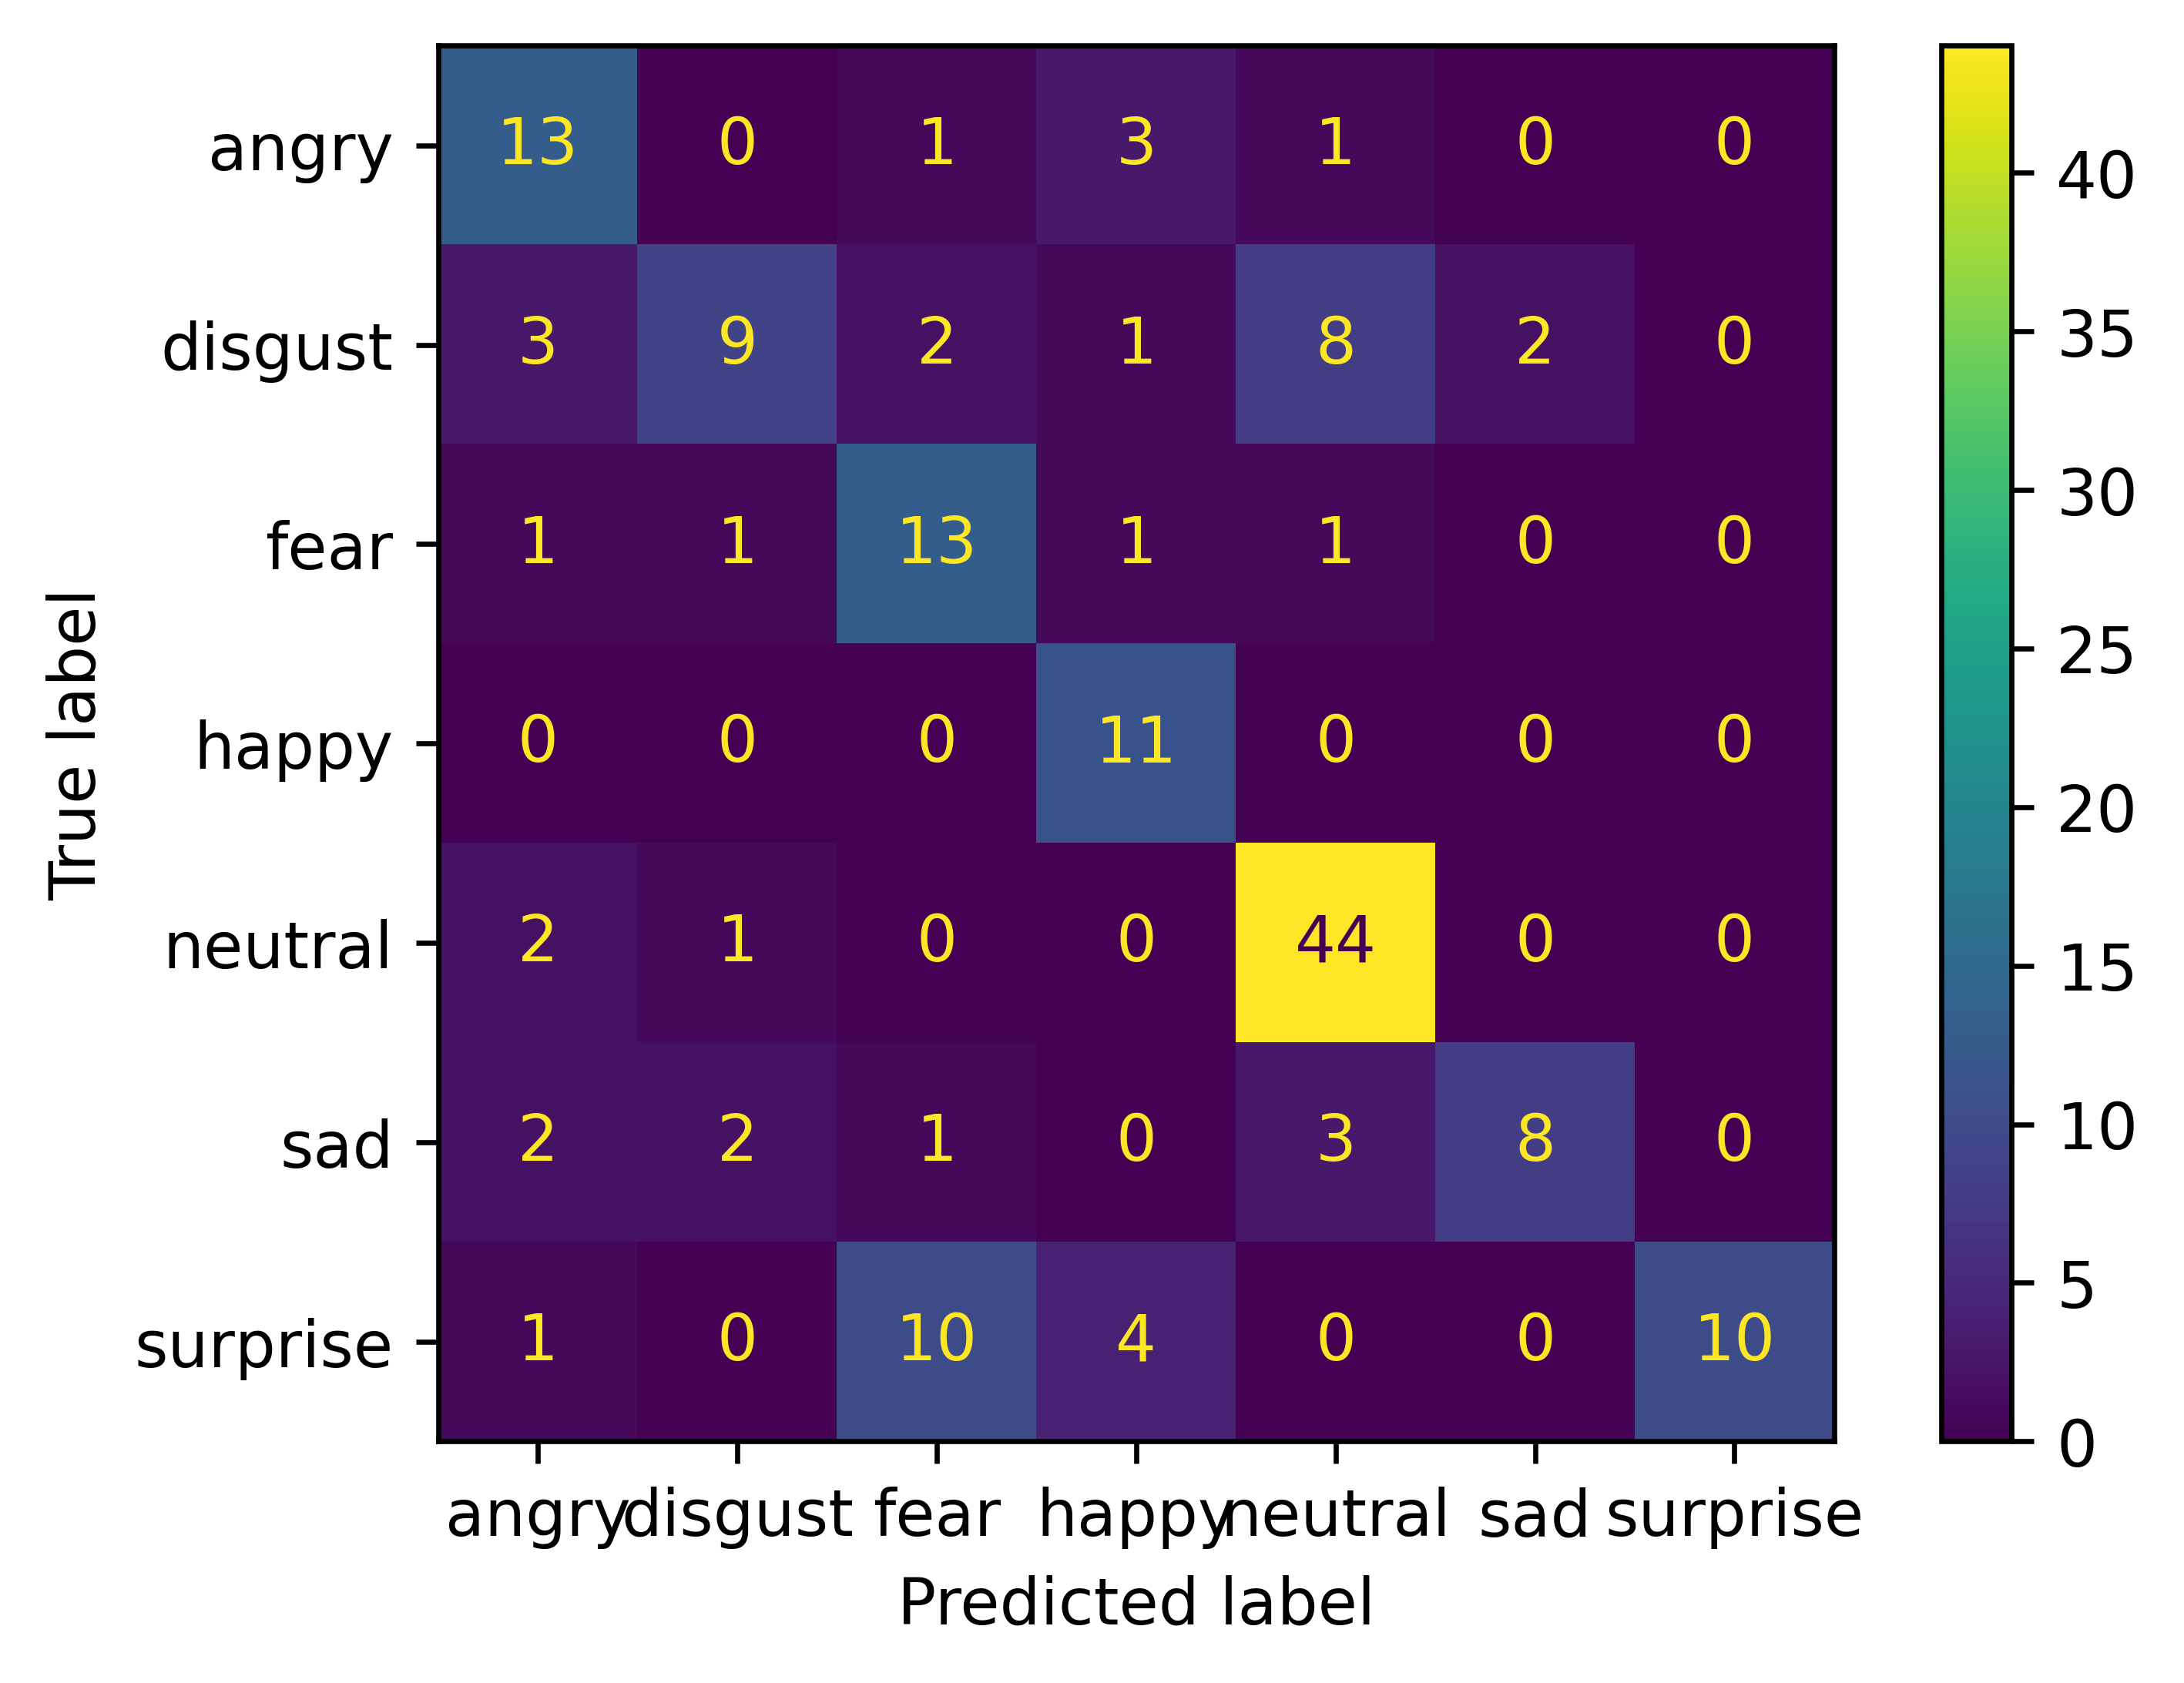

In [ ]:
#plt.rcParams['figure.dpi'] = 600
confusion_matrix(y_test,y_test_hat)
# disp=plot_confusion_matrix(grid, X_test, y_test,cmap=plt.cm.Blues)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_test_hat), display_labels = grid.classes_)
cm_display.plot()
plt.show()

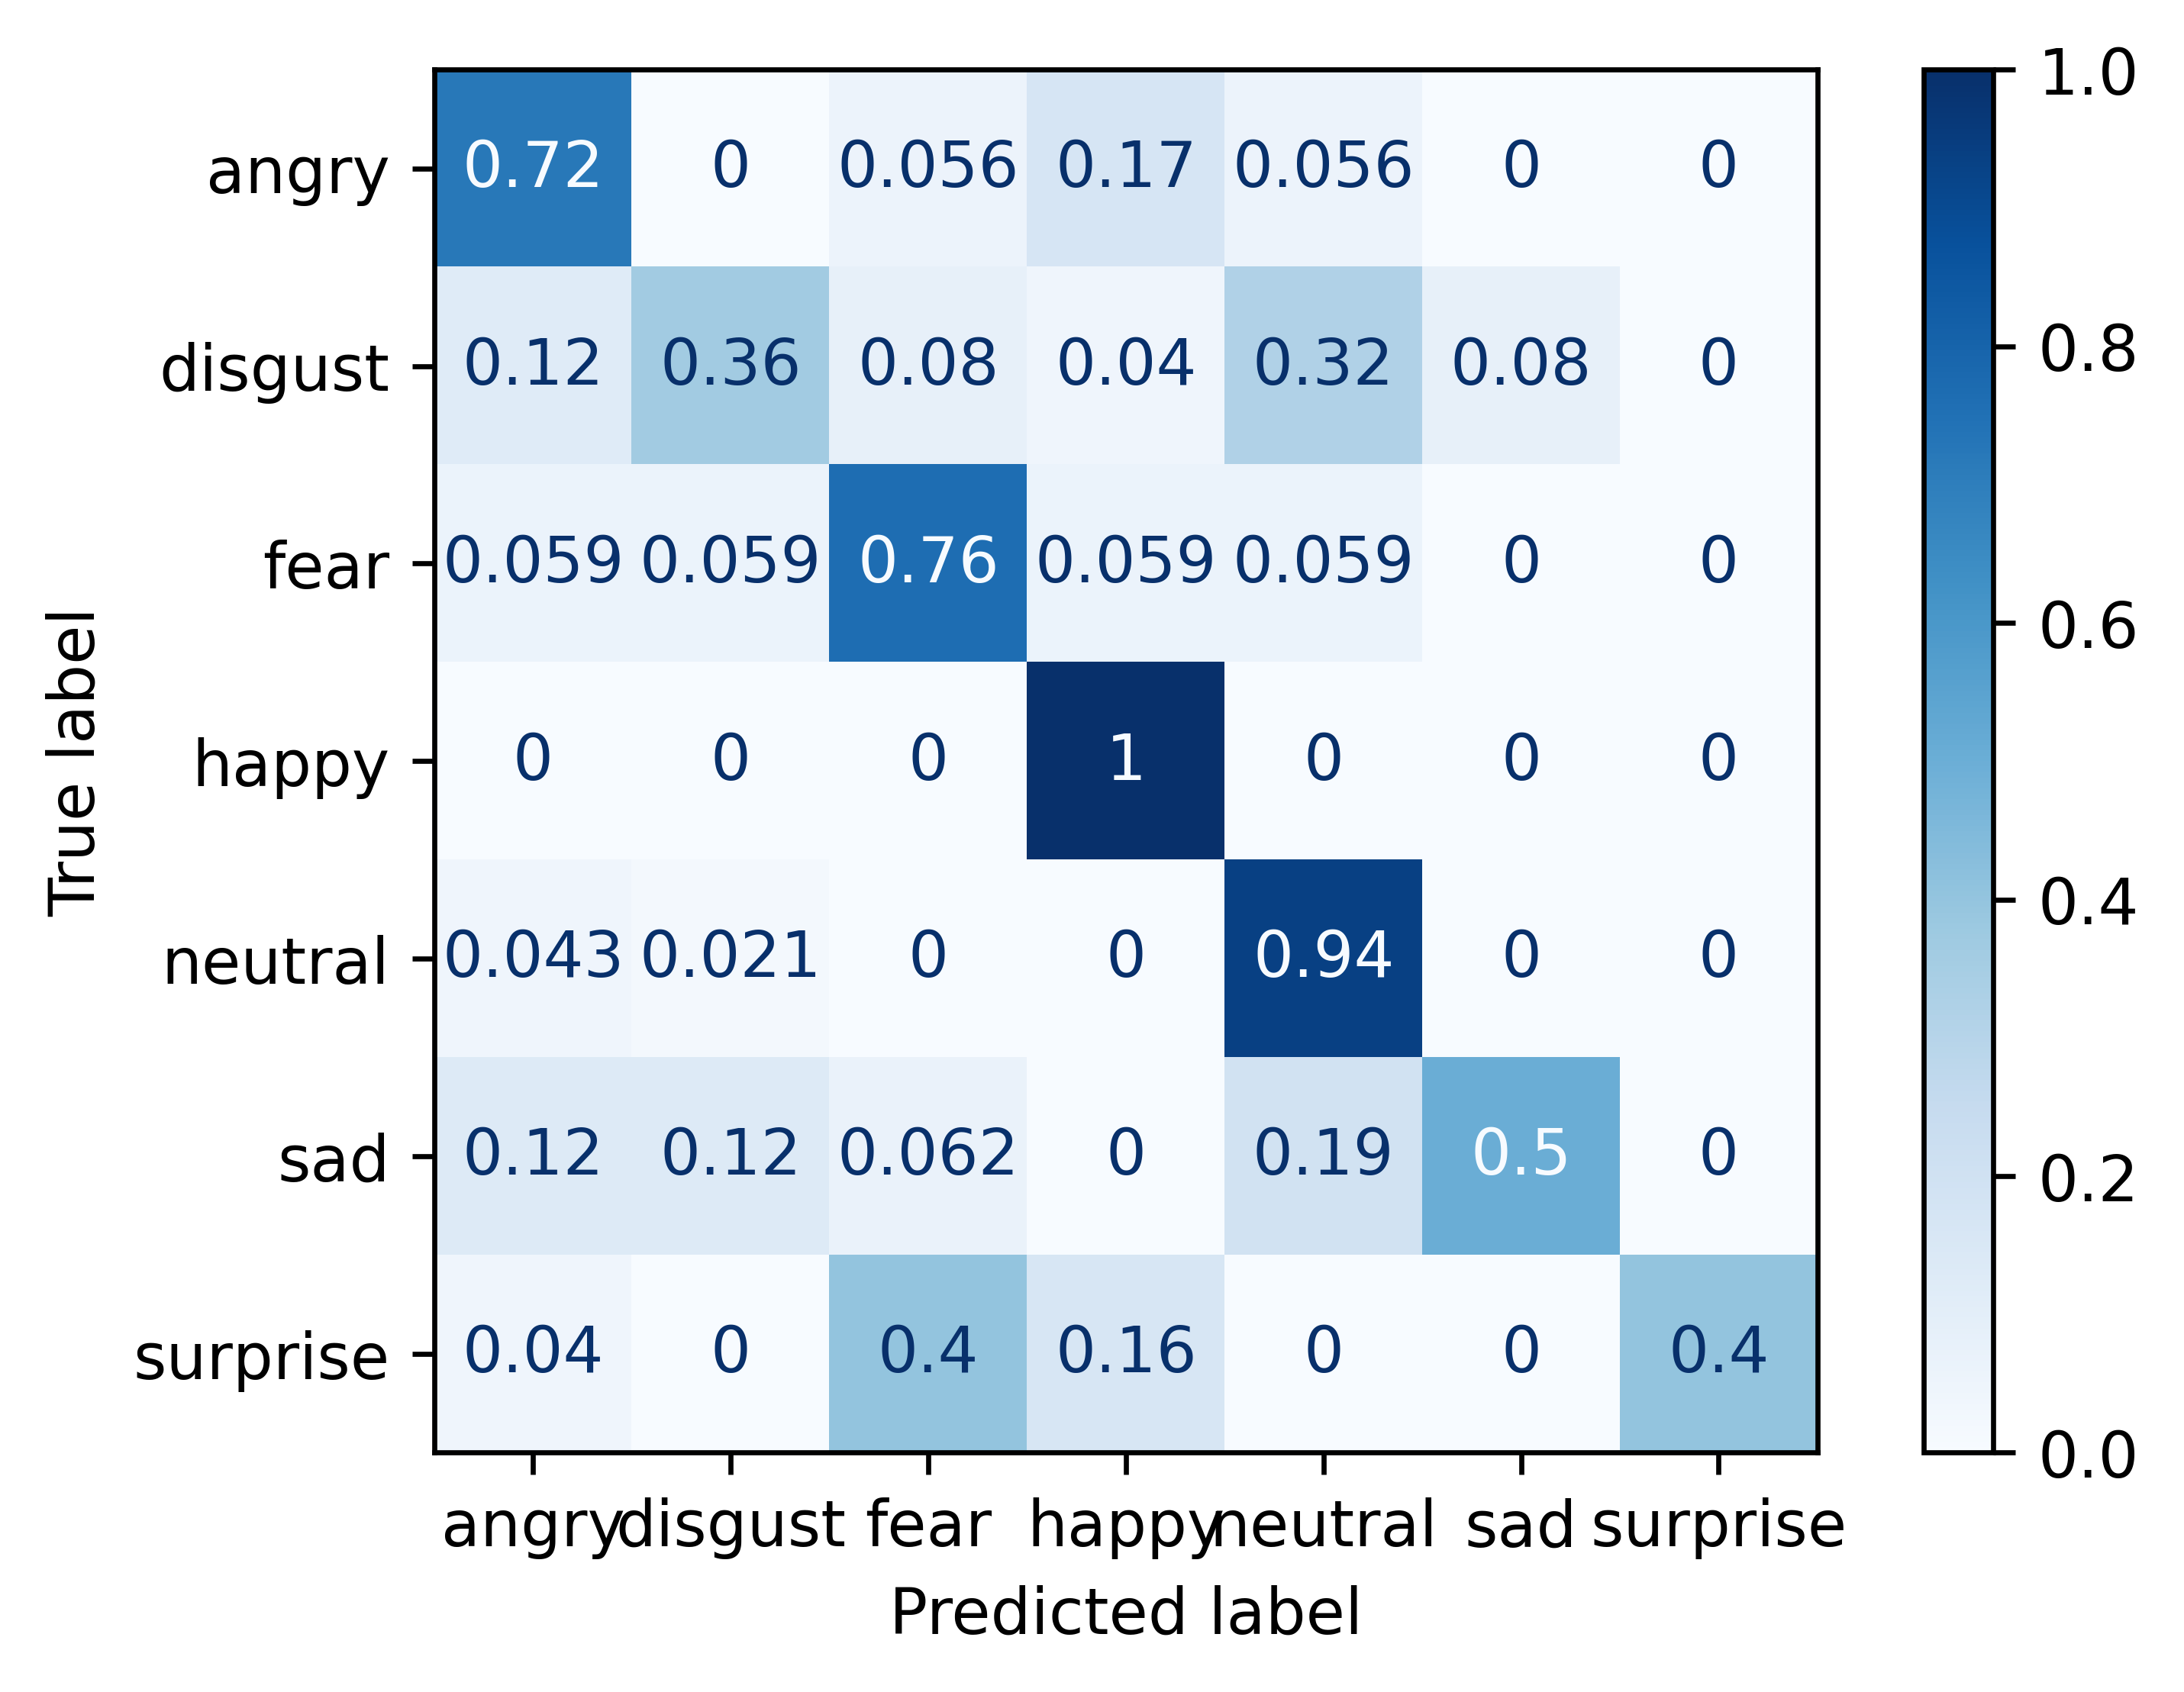

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
    grid,
    X_test,
    y_test,
    display_labels=grid.classes_,
    cmap=plt.cm.Blues,
    normalize="true",
)


plt.show()

In [ ]:
confusion_matrix(y_test,y_test_hat)

array([[17,  0,  0,  3,  0,  0,  0],
       [ 2,  8,  1,  3,  4,  1,  1],
       [ 1,  4,  1,  2,  0,  2,  4],
       [ 1,  1,  0, 15,  0,  0,  3],
       [ 3,  1,  0,  1, 43,  1,  0],
       [ 0,  0,  1,  0,  6, 10,  1],
       [ 1,  0,  3,  5,  0,  0,  9]])

The results are much better than the paper - need to do statistical runs

We have run the SVC on one of the possible batches. We then selected the best parameters for the SVM. Now, we use these parameters for the statistical runs. We also store the confusion matrices for each of the run to see a more finer classification error!

In [ ]:
#selecting the best possible parameters
C = grid_search.best_params_["C"]
gamma = grid_search.best_params_["gamma"]
kernel = grid_search.best_params_["kernel"]

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

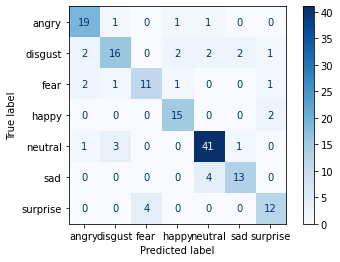

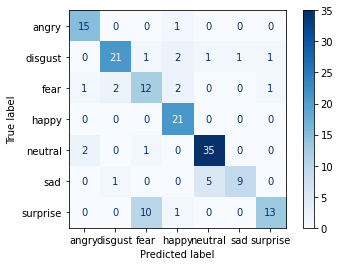

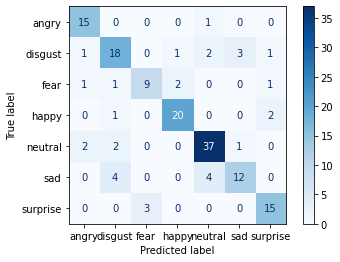

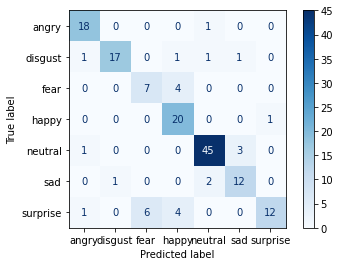

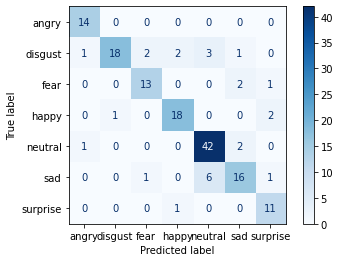

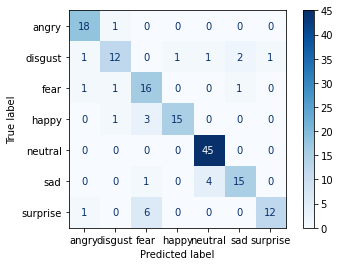

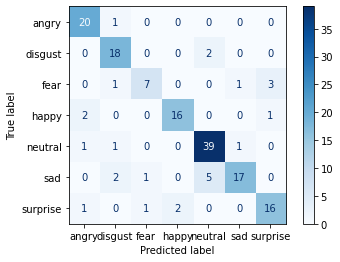

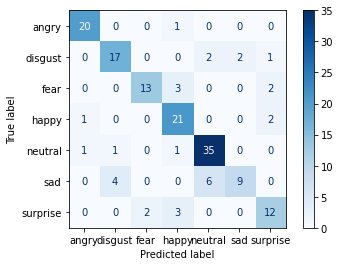

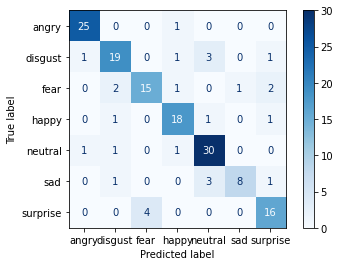

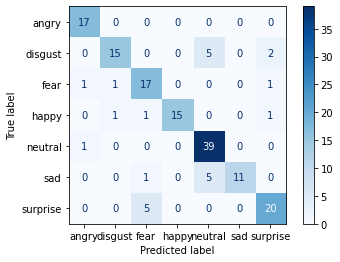

In [ ]:
from sklearn.svm import SVC
training_accuracy = []
testing_accuracy = []
confusion_matrices = []

for _ in range(10):
  X_train, X_test, y_train, y_test, speaker_identity_train, speaker_identity_test = train_test_split(X, y, speaker_identity, test_size=0.33)#setting random state to None => different training data
  X_train = (X_train - X_train.min(0)) / X_train.ptp(0)
  X_test = (X_test - X_test.min(0)) / X_test.ptp(0)
  model = SVC(C=C, gamma = gamma, kernel = kernel)
  model_fitted = model.fit(X_train, y_train)
  training_accuracy.append(model_fitted.score(X_train, y_train))
  testing_accuracy.append(model_fitted.score(X_test,y_test))
  y_test_hat = model_fitted.predict(X_test)
  confusion_matrices.append(confusion_matrix(y_test, y_test_hat))
  plot_confusion_matrix(grid, X_test, y_test,cmap=plt.cm.Blues)

In [ ]:
testing_accuracy

[0.6163522012578616,
 0.6226415094339622,
 0.6415094339622641,
 0.7044025157232704,
 0.559748427672956,
 0.6540880503144654,
 0.6415094339622641,
 0.6289308176100629,
 0.6163522012578616,
 0.6226415094339622]

In [ ]:
training_accuracy

[0.881619937694704,
 0.8909657320872274,
 0.8909657320872274,
 0.881619937694704,
 0.8878504672897196,
 0.897196261682243,
 0.8785046728971962,
 0.8878504672897196,
 0.8940809968847352,
 0.8691588785046729]

In [ ]:
disp=plot_confusion_matrix(grid, X_test, y_test,cmap=plt.cm.Blues)

# Leave One Speaker Out (LOSO) method of training

Now, we need to do Leave One speaker out method to test the actual accuracy of the model to unseen data which included as unknown speaker.

Extracting the files same as before but we leave a speaker out

In [ ]:
ls = ['JK', 'DC', 'KL', 'JE']
dele = ls[np.random.randint(0, 3)]

ls.remove(dele)
ls

['DC', 'KL', 'JE']

In [ ]:
#https://www.kaggle.com/code/mihaibeuca1997/ser-cnn-v2
savee_directory_list = os.listdir(pathToData)
savee_directory_list = ['DC', 'JE', 'KL'] #removed speaker 'JK' from the training data

file_emotion = []
file_path = []
speaker_identity = []

for fileDir in savee_directory_list:
  for file in os.listdir(pathToData + fileDir):
    speaker_identity.append(fileDir)
    file_path.append(pathToData + fileDir+"/" + file)
    #part = file.split('_')[1]
    ele = file[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
Savee_df.Emotions.value_counts()

neutral     90
sad         45
happy       45
fear        45
surprise    45
angry       45
disgust     45
Name: Emotions, dtype: int64

In [ ]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)
smile.feature_names

data, sampling_rate = librosa.load(file_path[0])
max_length = len(data)
df = smile.process_signal(
    data,
    sampling_rate
)
for audioFile in file_path[1:]: 
  data, sampling_rate = librosa.load(audioFile)
  if len(data)>= max_length:#finding maximum length across all the utterances
    max_length = len(data)
  df = pd.concat([df, smile.process_signal(
    data,
    sampling_rate
)])

X = df.to_numpy() #no_of_samples x 88

y = file_emotion



In [ ]:
X = (X - X.min(0)) / X.ptp(0)

In [ ]:
X.shape, len(y)

((360, 88), 360)

Thus, the above forms our training data. Notice, that we have left one speaker out. We will include this speaker in our test data we follow the same procedure as above!

In [ ]:
#https://www.kaggle.com/code/mihaibeuca1997/ser-cnn-v2
savee_directory_list = os.listdir(pathToData)
savee_directory_list = ['JK'] #removed speaker 'JK' from the training data

file_emotion = []
file_path = []
speaker_identity = []

for fileDir in savee_directory_list:
  for file in os.listdir(pathToData + fileDir):
    speaker_identity.append(fileDir)
    file_path.append(pathToData + fileDir+"/" + file)
    #part = file.split('_')[1]
    ele = file[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')
        

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


path_df = pd.DataFrame(file_path, columns=['Path'])
Savee_df = pd.concat([emotion_df, path_df], axis=1)
Savee_df.head()
Savee_df.Emotions.value_counts()

smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)
smile.feature_names

data, sampling_rate = librosa.load(file_path[0])
max_length = len(data)
df = smile.process_signal(
    data,
    sampling_rate
)
for audioFile in file_path[1:]: 
  data, sampling_rate = librosa.load(audioFile)
  if len(data)>= max_length:#finding maximum length across all the utterances
    max_length = len(data)
  df = pd.concat([df, smile.process_signal(
    data,
    sampling_rate
)])

X_test = df.to_numpy() #no_of_samples x 88

y_test = file_emotion



X_test.shape, len(y_test)

((120, 88), 120)

In [ ]:
X_test = (X_test - X_test.min(0)) / X_test.ptp(0)

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score,accuracy_score, plot_confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
# https://machinelearningknowledge.ai/python-sklearn-support-vector-machine-svm-tutorial-with-example-gridsearchcv/
from sklearn.model_selection import GridSearchCV

#Create a svm Classifier and hyper parameter tuning 
ml = svm.SVC() 
  
# defining parameter range
param_grid = {'C': [ 1, 10, 100, 1000,10000], 
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'kernel': ['linear']} #'rbf'
  
grid = GridSearchCV(ml, param_grid, refit = True, verbose = 1,cv=10)
  
# fitting the model for grid search
grid_search=grid.fit(X, y)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


In [ ]:
print(grid_search.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 70.83%


Accuracy for our testing dataset with tuning is : 50.00%


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


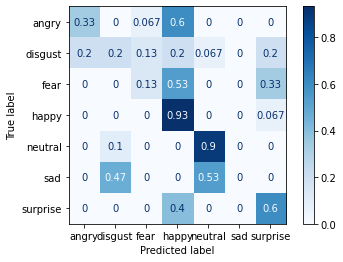

In [ ]:
y_test_hat=grid.predict(X_test)
test_accuracy=accuracy_score(y_test,y_test_hat)*100
test_accuracy
print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

#plt.rcParams['figure.dpi'] = 600
confusion_matrix(y_test,y_test_hat)
disp=plot_confusion_matrix(grid, X_test, y_test,cmap=plt.cm.Blues, normalize = 'true')

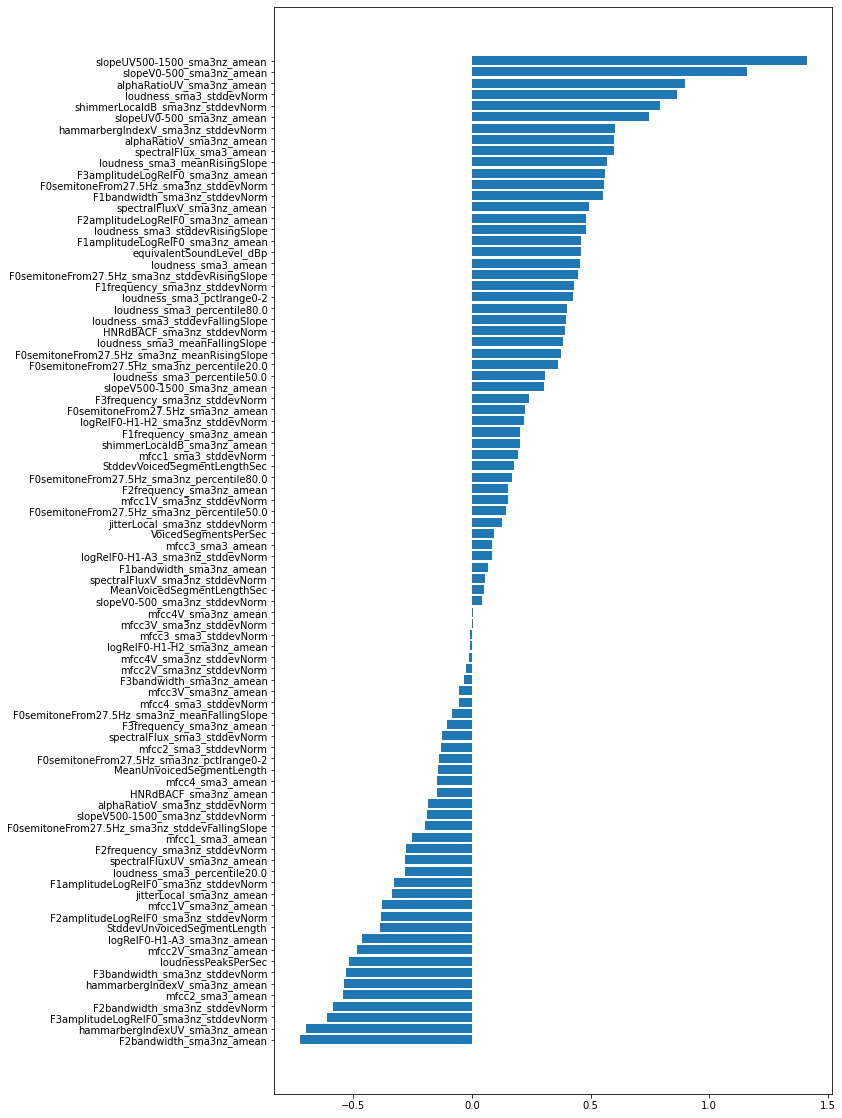

In [ ]:
from sklearn.svm import SVC

#https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize = (10, 20))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

#selecting the best possible parameters
C = grid_search.best_params_["C"]
gamma = grid_search.best_params_["gamma"]
kernel = grid_search.best_params_["kernel"]

svmModel = SVC(C=C, gamma = gamma, kernel = kernel)
model_fitted = svmModel.fit(X, y)
f_importances(model_fitted.coef_[0], smile.feature_names)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.00800154, 0.00785108, 0.00764875, 0.01017025, 0.01182489,
        0.01537721, 0.0148335 , 0.01495326, 0.01608455, 0.01498599,
        0.01631458, 0.01713023, 0.01701689, 0.01707747, 0.01651223,
        0.01656783, 0.01695859, 0.01686904, 0.01628959, 0.01769516,
        0.01683407, 0.01657166, 0.01641307, 0.01685901, 0.01653745]),
 'std_fit_time': array([0.0024384 , 0.00149899, 0.00103799, 0.00199216, 0.00125221,
        0.00263486, 0.00105831, 0.00139156, 0.00127109, 0.00106641,
        0.0013316 , 0.00148153, 0.00144789, 0.00145876, 0.00142588,
        0.00159459, 0.00205988, 0.00122229, 0.00129433, 0.00182312,
        0.0015073 , 0.00178335, 0.0014002 , 0.00196397, 0.00148855]),
 'mean_score_time': array([0.00106721, 0.00109584, 0.00114698, 0.00152652, 0.00164688,
        0.00151868, 0.00152369, 0.00149424, 0.00152593, 0.00159035,
        0.00150464, 0.00151594, 0.00154877, 0.00171916, 0.00153446,
        0.00148811, 0.00148351, 0.00147979, 0.0015038 , 0.00

In [ ]:
arr = np.zeros((25,))
for i in range(0, 10):
  string =f'split{i}_test_score'
  arrr = grid.cv_results_[string]
  arr+=arrr
arr*10#to get accuracy

array([70.83333333, 70.83333333, 70.83333333, 70.83333333, 70.83333333,
       68.05555556, 68.05555556, 68.05555556, 68.05555556, 68.05555556,
       66.38888889, 66.38888889, 66.38888889, 66.38888889, 66.38888889,
       66.38888889, 66.38888889, 66.38888889, 66.38888889, 66.38888889,
       66.38888889, 66.38888889, 66.38888889, 66.38888889, 66.38888889])

# Leave one Speaker out method
In a round robin fashion, we leave out one speaker at a time and then tune for maximum average accuracy in a way

In [ ]:
modelsSVM = []
arr = np.zeros((25,))
X_test_RR = []
y_test_RR = []
testing_accuracy = []
for i in range(0, 4):
  ls = ['JK', 'DC', 'KL', 'JE']
  dele = ls[i]
  ls.remove(dele)
  savee_directory_list = ls

  file_emotion = []
  file_path = []
  speaker_identity = []
  
  for fileDir in savee_directory_list:
    for file in os.listdir(pathToData + fileDir):
      speaker_identity.append(fileDir)
      file_path.append(pathToData + fileDir+"/" + file)
      #part = file.split('_')[1]
      ele = file[:-6]
      if ele=='a':
          file_emotion.append('angry')
      elif ele=='d':
          file_emotion.append('disgust')
      elif ele=='f':
          file_emotion.append('fear')
      elif ele=='h':
          file_emotion.append('happy')
      elif ele=='n':
          file_emotion.append('neutral')
      elif ele=='sa':
          file_emotion.append('sad')
      else:
          file_emotion.append('surprise')
          

  emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


  path_df = pd.DataFrame(file_path, columns=['Path'])
  Savee_df = pd.concat([emotion_df, path_df], axis=1)
  Savee_df.head()
  Savee_df.Emotions.value_counts()

  smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,)


  data, sampling_rate = librosa.load(file_path[0])
  max_length = len(data)
  df = smile.process_signal(
      data,
      sampling_rate
  )
  for audioFile in file_path[1:]: 
    data, sampling_rate = librosa.load(audioFile)
    if len(data)>= max_length:#finding maximum length across all the utterances
      max_length = len(data)
    df = pd.concat([df, smile.process_signal(
      data,
      sampling_rate
  )])

  X = df.to_numpy() #no_of_samples x 88

  y = file_emotion

  X = (X - X.min(0)) / X.ptp(0)



  savee_directory_list = [dele] #removed speaker 'JK' from the training data

  file_emotion = []
  file_path = []
  speaker_identity = []

  for fileDir in savee_directory_list:
    for file in os.listdir(pathToData + fileDir):
      speaker_identity.append(fileDir)
      file_path.append(pathToData + fileDir+"/" + file)
      #part = file.split('_')[1]
      ele = file[:-6]
      if ele=='a':
          file_emotion.append('angry')
      elif ele=='d':
          file_emotion.append('disgust')
      elif ele=='f':
          file_emotion.append('fear')
      elif ele=='h':
          file_emotion.append('happy')
      elif ele=='n':
          file_emotion.append('neutral')
      elif ele=='sa':
          file_emotion.append('sad')
      else:
          file_emotion.append('surprise')
      

  emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])


  path_df = pd.DataFrame(file_path, columns=['Path'])
  Savee_df = pd.concat([emotion_df, path_df], axis=1)
  Savee_df.head()
  Savee_df.Emotions.value_counts()

  smile = opensmile.Smile(
      feature_set=opensmile.FeatureSet.eGeMAPSv02,
      feature_level=opensmile.FeatureLevel.Functionals,
  )
  smile.feature_names

  data, sampling_rate = librosa.load(file_path[0])
  max_length = len(data)
  df = smile.process_signal(
      data,
      sampling_rate
  )
  for audioFile in file_path[1:]: 
    data, sampling_rate = librosa.load(audioFile)
    if len(data)>= max_length:#finding maximum length across all the utterances
      max_length = len(data)
    df = pd.concat([df, smile.process_signal(
      data,
      sampling_rate
  )])

  X_test = df.to_numpy() #no_of_samples x 88

  y_test = file_emotion

  X_test_RR.append(X_test)
  y_test_RR.append(y_test)

  X_test.shape, len(y_test)
  X_test = (X_test - X_test.min(0)) / X_test.ptp(0)


  



  

  ml = svm.SVC() 
    
  # defining parameter range
  param_grid = {'C': [ 1, 10, 100, 1000,10000], 
                'gamma': [1,0.1,0.01,0.001,0.0001],
                'kernel': ['linear']} #'rbf'
    
  grid = GridSearchCV(ml, param_grid, refit = True, verbose = 1,cv=10)
    
  # fitting the model for grid search
  grid_search=grid.fit(X, y)
  modelsSVM.append(ml)
  y_test_hat=grid.predict(X_test)
  test_accuracy=accuracy_score(y_test,y_test_hat)*100
  testing_accuracy.append(test_accuracy)
  print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )


  
  for i in range(0, 10):
    string =f'split{i}_test_score'
    arrr = grid.cv_results_[string]
    arr+=arrr


Fitting 10 folds for each of 25 candidates, totalling 250 fits
Accuracy for our testing dataset with tuning is : 50.00%
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Accuracy for our testing dataset with tuning is : 62.50%
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Accuracy for our testing dataset with tuning is : 36.67%
Fitting 10 folds for each of 25 candidates, totalling 250 fits
Accuracy for our testing dataset with tuning is : 59.17%


In [ ]:
arr*10.0/4

array([69.44444444, 69.44444444, 69.44444444, 69.44444444, 69.44444444,
       67.08333333, 67.08333333, 67.08333333, 67.08333333, 67.08333333,
       65.20833333, 65.20833333, 65.20833333, 65.20833333, 65.20833333,
       65.27777778, 65.27777778, 65.27777778, 65.27777778, 65.27777778,
       65.27777778, 65.27777778, 65.27777778, 65.27777778, 65.27777778])

In [ ]:
sum(testing_accuracy)/4

52.08333333333333

# t-SNE

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [ ]:
 # Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot()#aspect='equal'
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-85, 65)
    #plt.ylim(-85, 65)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [ ]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=10)
pca_result = pca.fit_transform(X_train)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.047478437423706055 seconds


In [ ]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [8.4320897e-01 7.0980325e-02 4.0352017e-02 1.5788369e-02 8.2736602e-03
 7.9103550e-03 7.1664685e-03 2.1232832e-03 1.6360392e-03 7.5510389e-04]


<ipython-input-54-24cf5e591d10>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-75.70019, 16.886694, '0'),
  Text(-73.641716, -63.71615, '1'),
  Text(-72.72081, -113.76171, '2'),
  Text(-72.2303, -145.51915, '3'),
  Text(-74.59938, -76.27822, '4'),
  Text(-74.316734, -72.03392, '5'),
  Text(-72.27575, -88.680664, '6')])

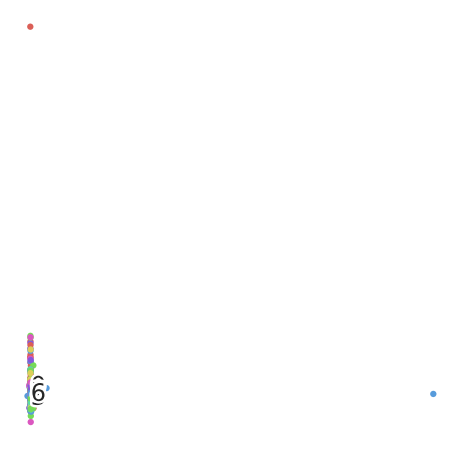

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
# i = 0
# oheThing = []
# for thing in np.sort(np.unique(y_train)):
#   oheThing.append([thing, i])
#   i+=1
# enc = OneHotEncoder.fit(oheThing)

le = preprocessing.LabelEncoder()
le.fit(y_train)


fashion_scatter(top_two_comp.values, le.transform(y_train)) # Visualizing the PCA output

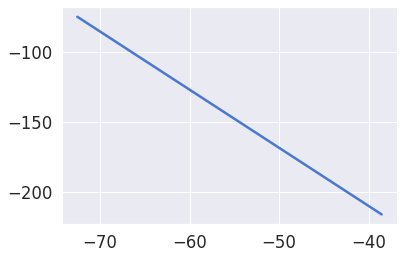

In [ ]:
plt.plot(top_two_comp.values[0], top_two_comp.values[1])

In [ ]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(X_train)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 5.398142337799072 seconds


<ipython-input-54-24cf5e591d10>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-9.047304, 3.5974154, '0'),
  Text(-2.615198, 0.29533625, '1'),
  Text(1.1264498, -0.28143406, '2'),
  Text(4.133188, -0.58913594, '3'),
  Text(-0.7391378, -0.83992344, '4'),
  Text(-0.8371326, -5.8317633, '5'),
  Text(-0.34970218, 3.2195315, '6')])

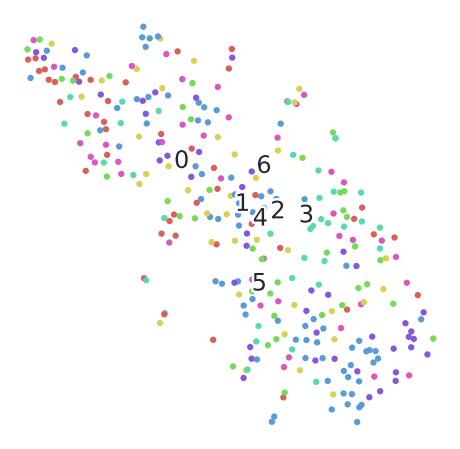

In [ ]:
fashion_scatter(fashion_tsne, le.transform(y_train))